# Taller 1




#Integrantes
>1. Joaquín Montes (ROL 201873509-4)
>2. Carlos Naranjo (ROL 201892005-3)
>3. Sofía Riquelme (ROL 202063615-4)


<table align='left'>
<tr>
<td><img src='https://www.hydro.com/globalassets/08-about-hydro/hydro-worldwide/netherlands/pp-tulips.jpg' width='900'/> </td>
</tr>
</table>


## Objetivos de aprendizaje
Al final de este taller el/la alumno/a sabrá:

> * Distinguir las funciones de las principales librerías en Python para el manejo y análisis exploratorio de datos.
> * Aplicar técnicas de visualización para generar gráficos que le permitan llegar a conclusiones descriptivas acerca de una muestra.
> * Obtener estadísticas de tendencia y dispersión univariadas sobre las variables presentes en la muestra.
> * Aplicar transformaciones sobre conjuntos de datos que le permitan, posteriormente, preparár los datos de la muestra para realizar un proceso de modelamiento.



## Datos

En este taller se utilizará el dataset `Energy consumption of the Netherlands`, disponible libremente en [Kaggle](https://www.kaggle.com/lucabasa/dutch-energy). Este dataset contiene información histórica sobre la red de energía, manejada por distintas compañías en los Paises Bajos para distintas áreas agregadas por el código postal. Vale la pena notar que, como se indica en la página del dataset, el mercado es no competitivo, es decir, solo una compañía es la encargada de entregar servicios a un determinado sector (descrito por el código postal), lo que implica que no hay fuga de clientes de una compañía a otra a través de los años.

En la carpeta entregada para este taller se muestran dos sub-carpetas:

> - **Electricity:** Contiene varios archivos en formato csv con un nombre que sigue la sintáxis:`<nombreEmpresa>_electricity_<año>.csv`, donde `nombreEmpresa` es el nombre de la empresa proveedora de electricidad.


> - **Gas:** Contiene varios archivos en formato csv con un nombre que sigue la sintáxis:`<nombreEmpresa>_gas_<año>.csv`, donde `nombreEmpresa` es el nombre de la empresa proveedora de gas.

Con respecto a las variables medidas, se debe notar que slgunas empresas proveedoras miden algunas características adicionales, para efectos de este estudio se le sugiere conservar las variables comunes a todas las empresas:

- `net_manager`: Código del administrador regional de la red o nombre del mismo.
- `purchase_area`: Código del área de donde es comprada la energía.
- `street`: Nombre de la calle de las viviendas registradas.
- `zipcode_from`: Código postal _"inicial"_ que define la zona (junto con `zipcode_to`) resumida en el registro.
- `zipcode_to`: Código postal _"final"_ que define la zona (junto con `zipcode_from`) resumida en el registro.
- `city`: Ciudad de las viviendas.
- `num_connections`: Número de conexiones en el rango de los códigos postales.
- `delivery_perc`: Porcentaje del consumo neto de electricidad o gas. Mientras más bajo significa que hubo mayor retorno de energía a la red, por ejemplo, mediante paneles solares.
- `perc_of_active_connections`: Procentaje de conexiones activas en el rango definido por los códigos postales.
- `type_conn_perc`: Porcentaje del principal tipo de conexión en el rango definido por los códigos potales, es decir, es el porcentaje del que corresponde el tipo de conexión que es moda dentro del espacio muestreado, con respecto a todos los tipos de conexiones de esa misma zona.
- `type_of_connection`: Principal tipo de conexión en la zona definida por los rangos de código postal.
- `annual_consume`: Consumo anual extraído de la red, en $kW/h$ (kilowatt por hora) para electricitdad y $m^3$ para gas.



In [ ]:
!wget www.inf.utfsm.cl/~jnancu/netherlands-energy.zip 
!unzip netherlands-energy.zip 

In [ ]:
BASE_DATA_PATH = 'netherlands-energy' 

In [ ]:
!ls 'netherlands-energy' 

ls: cannot access 'netherlands-energy': No such file or directory


Como ayuda, el código de más abajo carga todos los archivos csv en un único dataframe conservando la información del año.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from glob import glob
import re

plt.rcParams['figure.figsize'] = (15,10)

selected_cols = ["net_manager" ,"purchase_area", "street", "zipcode_from", "zipcode_to", "city", "num_connections", "delivery_perc", "perc_of_active_connections",
                 "type_conn_perc", "type_of_connection", "annual_consume", "year"]
                 
# Si no han tenido mucha experiencia con comprensiones de lista probablemente l@s alumn@s opten por ciclos simples

# Electricity
list_dfs_electricity = []
for file_path in glob(f'{BASE_DATA_PATH}/Electricity Corrected/*.csv'):
  yr = file_path.split('_')[-1].split('.')[0]
  if '0101' in yr:
    yr = yr.replace('0101', '')
  this_df = pd.read_csv(file_path)
  this_df['year'] = int(yr)
  list_dfs_electricity.append(this_df)

df_electricity = pd.concat(list_dfs_electricity)
df_electricity = df_electricity[selected_cols]

# Gas
list_dfs_gas = []
for file_path in glob(f'{BASE_DATA_PATH}/Gas Corrected/*.csv'):
  yr = file_path.split('_')[-1].split('.')[0]
  if '0101' in yr:
    yr = yr.replace('0101', '')
  this_df = pd.read_csv(file_path)
  this_df['year'] = int(yr)
  list_dfs_gas.append(this_df)

df_gas = pd.concat(list_dfs_gas)
df_gas = df_gas[selected_cols]


In [ ]:
99df_electricity['net_annual_cons'] = df_electricity['annual_consume'] * df_electricity['delivery_perc'] / 100
df_electricity['self_production'] = df_electricity['annual_consume'] - df_electricity['net_annual_cons']
df_gas['net_annual_cons'] = df_gas['annual_consume'] * df_gas['delivery_perc'] / 100
df_gas['self_production'] = df_gas['annual_consume'] - df_gas['net_annual_cons']

df_electricity['consume_per_conn'] = df_electricity['annual_consume'] / (df_electricity['num_connections'] * df_electricity['perc_of_active_connections'] / 100)
df_electricity.loc[df_electricity['consume_per_conn'] == np.inf, 'consume_per_conn'] = 0
df_gas['consume_per_conn'] = df_gas['annual_consume'] / (df_gas['num_connections'] * df_gas['perc_of_active_connections'] / 100)
df_gas.loc[df_gas['consume_per_conn'] == np.inf, 'consume_per_conn'] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Crearemos dos variables interesantes para análisis:

*   `self_production`: cantidad de energía autoproducida por los hogares (a través por ejemplo de paneles solares).
*   `consume_per_conn`: consumo medio de energía por conexión en una determinada zona.



## Problema de Estudio
Usted trabaja entregando servicios de consultoría y su actual cliente resulta ser una firma de inversionistas quienes están interesados en evaluar el desempeño del mercado de la energía eléctrica y de gas en los Países Bajos. La firma de inversionistas debe decidir si realizar una inversión y requiere por lo tanto conocer el estado del mercado de la energía en este país. Le encargan a usted la tarea de estudiarlo a partir de la muestra entregada en la sección anterior.

Para efectos de este estudio escoja un tipo de energía a estudiar y responda a las inquietudes de los clientes. Específicamente su cliente necesita alcarar al menos los siguientes puntos:




## Requerimientos del cliente (10 pts. c/u)

1.  ¿Cuáles son las 10 ciudades que consumieron más energía eléctrica el 2020? ¿Son las mismas 10 que consumieron una mayor cantidad anual de gas? Entregue estadísticas y un gráfico apropiado para apoyar su respuesta. ¿Tiene sentido lo que observa?

2.  ¿Cuál es el grado de acaparamiento que se observa en el mercado eléctrico nacional durante 2020? ¿En el mercado del gas? Responda analizando el número de conexiones por proveedor y la energía consumida por esas conexiones. Entregue medidas de tendencia y un gráfico apropiado para apoyar su respuesta.

3. ¿Cuánta energía consumió una conexión a la red durante 2020? Responda construyendo un histograma que muestre cómo se distribuye la cantidad de energía por conexión durante 2020. Describa el histograma en términos de modas, simetría, y sesgo. Entregue además estadísticas de tendencia y dispersión. Comente.

4. Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare el consumo por conexión de esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo inusualmente pequeño o inusualmente grande por conexión?

5. ¿Cuánta energía auto-generaron los hogares durante 2020? Responda construyendo y describiendo un gráfico que muestre cómo se distribuye la cantidad de energía total consumida por los hogares durante 2020, la cantidad de energía autogenerada ese año, y la fracción de la energía consumida que es autogenerada por los hogares. Comente. 

6. Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare la distribución de la cantidad de energía auto-generada en esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo auto-generado inusualmente pequeño o inusualmente grande?

7. ¿Existe una relación entre el consumo anual y la cantidad de conexiones de una ciudad? ¿Entre el consumo anual y la cantidad de energía auto-generada en la ciudad? 

8. ¿Está aumentado el consumo de gas en el país? ¿El consumo de electricidad? ¿Está aumentando o disminuyendo más un tipo de consumo que otro? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones. Comente lo que observa.

9. ¿Está aumentado la cantidad de energía auto-generada en el país? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones.  Comente lo que observa.


10. Proponga y desarrolle un análisis libre que no haya sido cubierto y que esté relacionada al objetivo del cliente (saber en qué empresas o ciudades o tipos de conexion invertir). Resuma también las principales conclusiones del estudio.


## Consejos y tips para su desarrollo
- Familiaricese con los tipos de datos que implementa pandas.
- Probablemente le sirva familiarizarse con las formas de hacer filtros según condiciones booleanas en pandas.
- La columna `type_conn_perc` presenta un pequeño problema: El punto flotante está especificado con una coma (`,`) en lugar de un punto (`.`), esto hace que pandas interprete los valores de esa columna como `object` cuando en realidad debiesen estar como tipo `float`, estudie como coercionar una columna en pandas de un tipo de dato a otro y somo aplicar transformaciones sobre cada uno de los elementos dentro de una columna (método `.apply()` por ejemplo).
- Puede agrupar datos de acuerdo a alguna columna de interés y después aplicar alguna función de agregación sobre alguna/s columna/s de interés con los métodos `.groupby()` y `.agg()` de la clase `DataFrame` y `GroupedDataFrame` respectivamente. Por ejemplo, si quisiese saber la cantidad de conexiones por ciudad podría agrupar por ciudad y agregar la columna `num_connections` con una operación de suma.
- Algunas funciones de visualización de la librería `seaborn` permiten la desagregación de los gráficos de acuerdo alguna variable categórica (idealmente) mediante la incorporación del parámetro `hue` en su firma, vea la documentación del método para saber como usarlo en caso de que lo requiera.




## Formalidades & Reglas


*   **Fecha límite:** la recopilación de las soluciones para corrección se hará el día martes 29 de Marzo a las 08:00 hrs. 
 
*   La solución debe desarrollarse como extensión del cuaderno con los enunciados, cambiando el nombre del archivo a *Taller1_INF280_I_2022_ENTREGA_NOMBRE_EQUIPO.ipynb*.

*  Se debe trabajar en equipos de 3 personas identificadas al inicio del cuaderno con la solución. Excepciones a esta regla deben ser conversadas con los profesores.

*  Pueden utilizar Python o R. Pueden re-usar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente.

*  Es posible utilizar apuntes, libros, y cualquier otro material que desee, pero debe ser el equipo quien desarrolle los ejercicios y comente los resultados en el cuaderno que entregará.

*  Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado.

*  Además del cuaderno, cada estudiante debe entregar un video (<=20 minutos) explicando lo que se hizo. Mientras se da la explicación, se debe recorrer el cuaderno con la solución enfatizando el análisis y las conclusiones (no detalles de código). Los videos debe ser subidos a una plataforma externa (Youtube, Google Drive, Dropbox, etc). Se deben sólo incluir links dentro del cuaderno, recordando otorgar los permisos para que se pueda revisar.



# **Desarrollo**

## Pregunta 1

 ¿Cuáles son las 10 ciudades que consumieron más energía eléctrica el 2020? ¿Son las mismas 10 que consumieron una mayor cantidad anual de gas? Entregue estadísticas y un gráfico apropiado para apoyar su respuesta. ¿Tiene sentido lo que observa?

A continuación se muestra las 10 ciudades que consumieron más energía eléctrica en el 2020: 
>1. Amsterdam
>2. 'S-Gravenhage
>3. Rotterdam
>4. Utrecht
>5. Almere
>6. Eindhoven
>7. Groningen
>8. Tilburg
>9. Arnhem
>10. Nijmegen

A continuación se muestra las 10 ciudades que consumieron una mayor cantidad anual de gas durante el 2020: 
>1. Amsterdam
>2. 'S-Gravenhage
>3. Rotterdam
>4. Eindhoven
>5. Groningen
>6. Urecht
>7. Haarlem
>8. Enschede
>9. Nijmege
>10. Arnhem

Se puede ver que los primeros 4 lugares son ocupados por las mismas ciudades, y en los siguientes 6 lugares si bien no aparecen en el mismo orden, se repiten varias.


A continuación se muestra el gráfico de las 10 ciudades con mayor consumo eléctrico y las 10 ciudades con más consumo de gas durante el 2020:

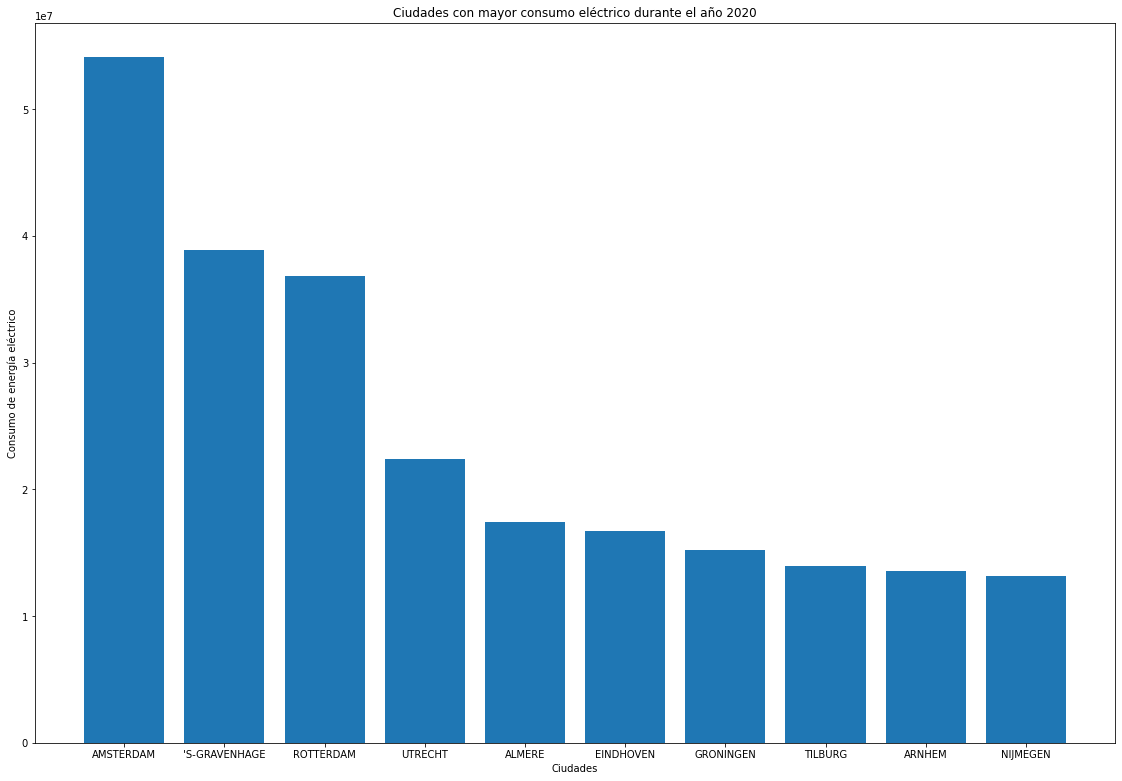

In [ ]:
#crea un nuevo dataframe que contiene solo los del año 2020

is_2020_e = df_electricity['year'] == 2020
filtered_df_electricity = df_electricity[is_2020_e]

#agrupa los resultados por ciudad (asi no muestra las mismas ciudades), y suma el consumo anual. El nlargest hace que muestre los 10 mayores
filtro_electricidad = filtered_df_electricity.groupby('city')['annual_consume'].sum().nlargest(10)
fig_electricidad = plt.figure() #primero configuro el gráfico
ax= fig_electricidad.add_axes([0,0,1,1]) #añado ejes

nombres=[]
consumo=[]
for x in filtro_electricidad.iteritems():
  nombres.append(x[0])
  consumo.append(x[1])

ax.bar(nombres,consumo)
plt.xlabel("Ciudades")
plt.ylabel("Consumo de energía eléctrico")
plt.title("Ciudades con mayor consumo eléctrico durante el año 2020")
plt.show()


In [ ]:
print('Consumo promedio de electricidad: ' + str(filtro_electricidad.mean()))


Consumo promedio de electricidad: 24230249.416


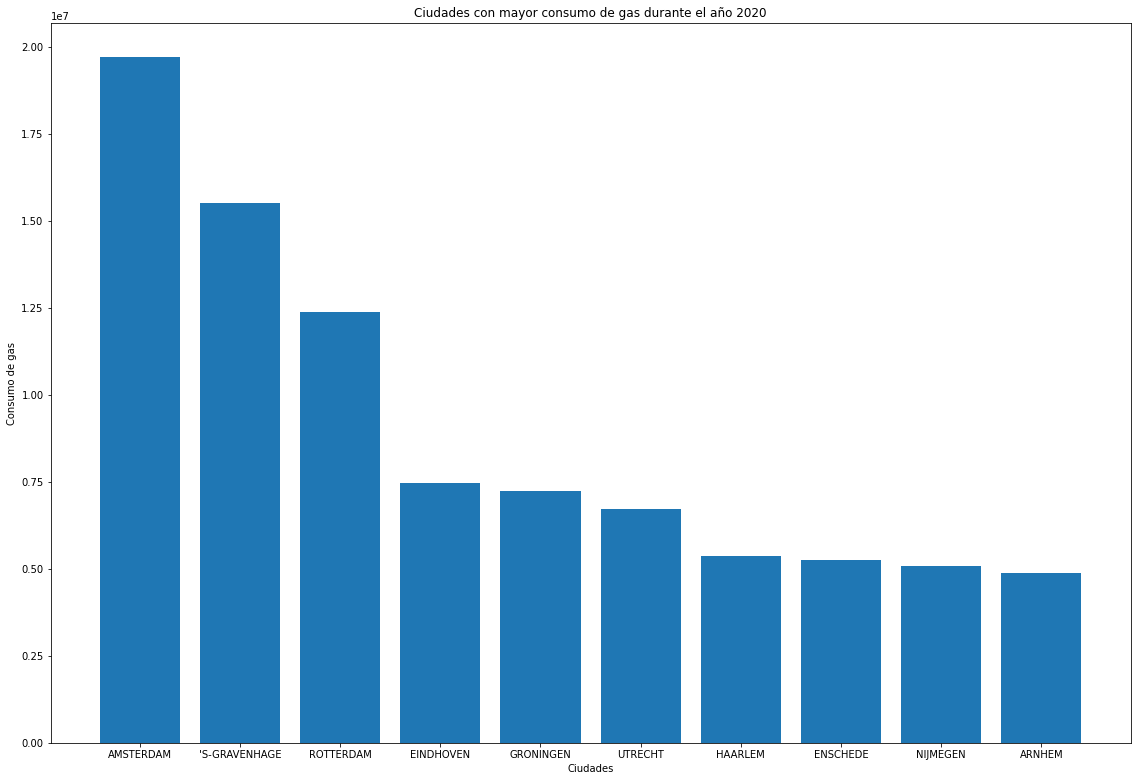

In [ ]:
#lo mismo que hice para lo de electricidad
is_2020_g = df_gas['year'] == 2020
filtered_df_gas = df_gas[is_2020_g]
filtro_gas = filtered_df_gas.groupby('city')['annual_consume'].sum().nlargest(10)

fig_gas = plt.figure() #primero configuro el gráfico
ax= fig_gas.add_axes([0,0,1,1]) #añado ejes

nombres=[]
consumo=[]

for x in filtro_gas.iteritems():
  nombres.append(x[0])
  consumo.append(x[1])

ax.bar(nombres,consumo)
plt.xlabel("Ciudades")
plt.ylabel("Consumo de gas")
plt.title("Ciudades con mayor consumo de gas durante el año 2020")
plt.show()

In [ ]:
print('Consumo promedio de gas: ' + str(filtro_gas.mean()))

Consumo promedio de gas: 8960557.05


##Pregunta 2

¿Cuál es el grado de acaparamiento que se observa en el mercado eléctrico nacional durante 2020? ¿En el mercado del gas? Responda analizando el número de conexiones por proveedor y la energía consumida por esas conexiones. Entregue medidas de tendencia y un gráfico apropiado para apoyar su respuesta.

En el gráfico a continuación se puede observar que Liander Electricity tiene un número de conexiones considerablemente mayor que el resto de los administradores de red en el mercado eléctrico. 





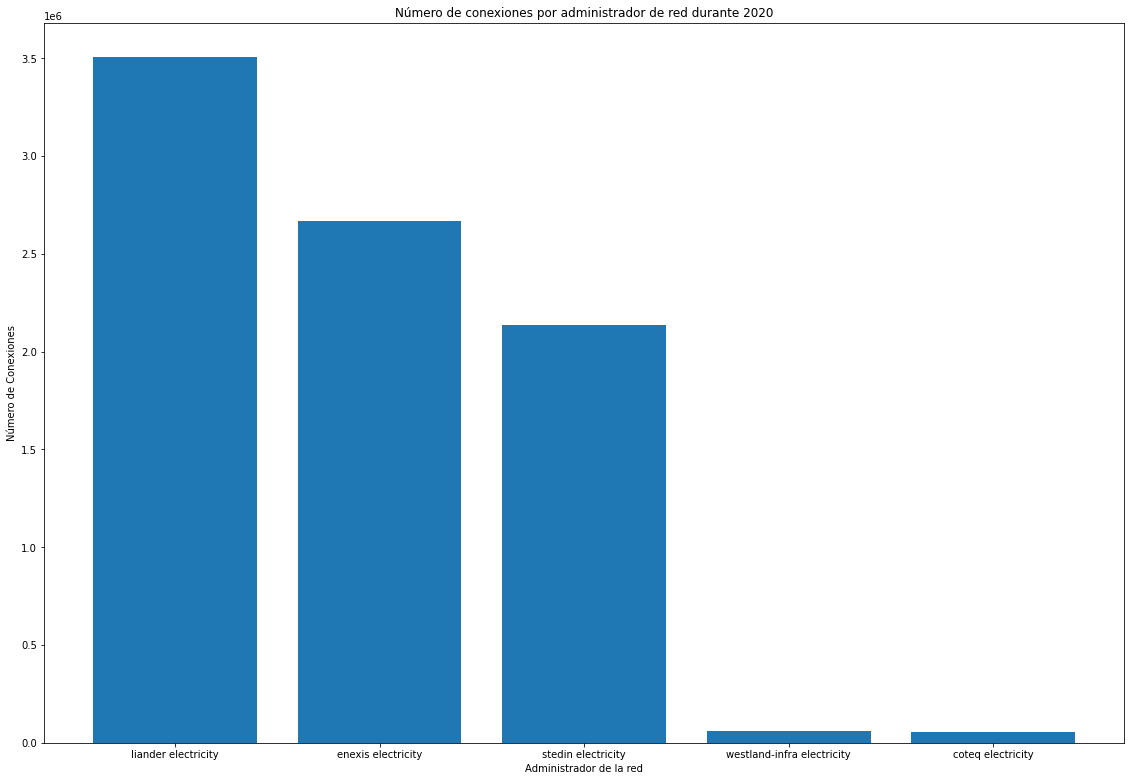

In [ ]:
#Número de conecciones por proveedor
net_conections = filtered_df_electricity.groupby("net_manager")["num_connections"].sum().nlargest(5)


managers = []
conecciones = []

for  x in net_conections.iteritems():
    managers.append(x[0])
    conecciones.append(x[1])

fig_managers_co = plt.figure() #primero configuro el gráfico
ax= fig_managers_co.add_axes([0,0,1,1]) #añado ejes x e y

ax.bar(managers,conecciones)
plt.xlabel("Administrador de la red")
plt.ylabel("Número de Conexiones")
plt.title("Número de conexiones por administrador de red durante 2020")
plt.show()


También, se muestran las conecciones promedio por administrador de red junto con la mediana:


In [ ]:
print("Conecciones promedio:", np.mean(conecciones))
print("Mediana de conecciones:", np.median(conecciones))

Conecciones promedio: 1684238.6
Mediana de conecciones: 2133441.0


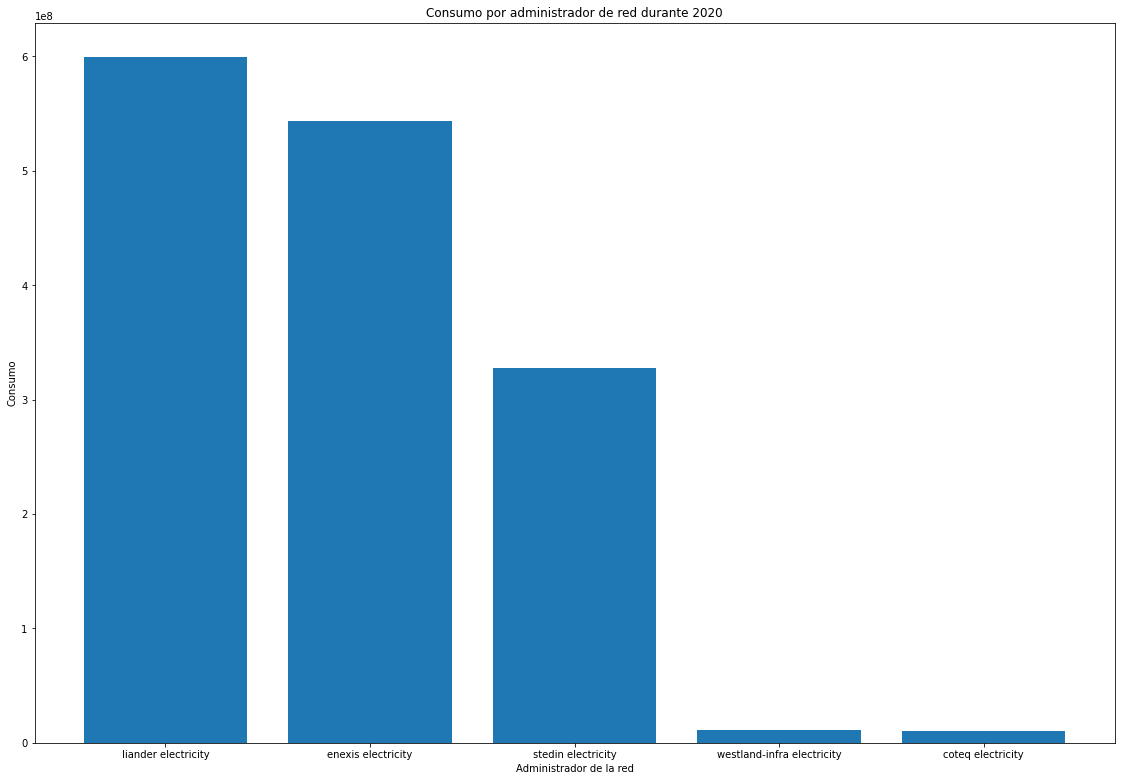

In [ ]:
# #consumo total de las conecciones

net_consumo = filtered_df_electricity.groupby("net_manager")["annual_consume"].sum().nlargest(5)

consumos = []

for x in net_consumo.iteritems():
    consumos.append(x[1])

fig_managers_consume = plt.figure() #primero configuro el gráfico
ax= fig_managers_consume.add_axes([0,0,1,1]) #añado ejes x e y

ax.bar(managers,consumos)
plt.xlabel("Administrador de la red")
plt.ylabel("Consumo")
plt.title("Consumo por administrador de red durante 2020")
plt.show()



El consumo promedio por administrador de red y mediana son:

In [ ]:
print("Consumo promedio:",np.mean(consumos))
print("Mediana de consumo:", np.median(consumos))

Consumo promedio: 298400207.97800004
Mediana de consumo: 327579326.03


Se puede concluir que hay un cierto grado de acaparamiento con Liander Electricity ya que es notoria la diferencia de la cantidad de conexiones y el consumo de ésta en comparación los otros administradores de red

##Pregunta 3

¿Cuánta energía consumió una conexión a la red durante 2020? Responda construyendo un histograma que muestre cómo se distribuye la cantidad de energía por conexión durante 2020. Describa el histograma en términos de modas, simetría, y sesgo. Entregue además estadísticas de tendencia y dispersión. Comente.

A continuación se muestra un histograma de los consumos por conexión durante el 2020. La negra corresponde al promedio y la línea roja corresponde a la mediana.

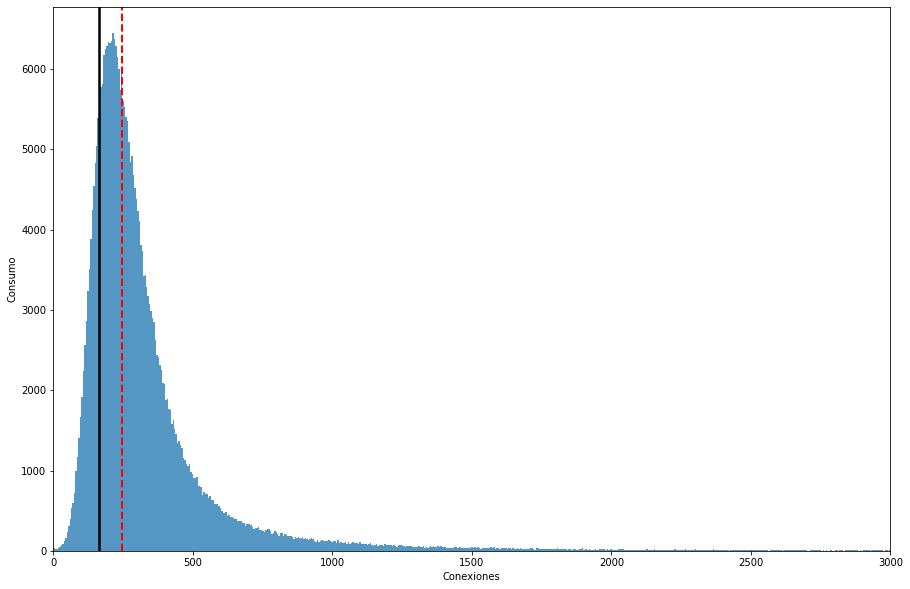

In [ ]:
#convertir a lista la columa de consumos por conexion de ambos dataframe
consumo_por_conexion_electricidad = filtered_df_electricity['consume_per_conn'].tolist()
consumo_por_conexion_gas = filtered_df_gas['consume_per_conn'].tolist()
largo_gas = len(consumo_por_conexion_gas)
largo_electricidad = len(consumo_por_conexion_electricidad)
consumo_por_conexion_total = []

#sumar valores de ambas listas
for i in range(0, min(largo_gas, largo_electricidad)):
  consumo_por_conexion_total.append(consumo_por_conexion_electricidad[i] + consumo_por_conexion_gas[i])
  
#construyo histograma de consumos por conexion
fig, ax = plt.subplots()
hist = sn.histplot(consumo_por_conexion_total, ax=ax)
ax.set_xlim(0,3000)
ax.axvline(filtered_df_electricity['consume_per_conn'].mean(), color='red', ls='--', lw=2)
plt.axvline(filtered_df_electricity['consume_per_conn'].median(), color='black', lw=2.5)
hist.set(xlabel = 'Conexiones', ylabel = 'Consumo')
plt.show()


En el histograma anterior se puede observar que es bastante asimétrico, porque la mitad de los datos están más concentrados cerca del valor 300.

##Pregunta 4

 Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare el consumo por conexión de esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo inusualmente pequeño o inusualmente grande por conexión?

A continuación se muestran las ciudades con mayor cantidad de conexiones y menor cantidad de conexiones:

In [ ]:
#filtrar ciudades con mayores y menores conexiones respectivamente
mayores_conexiones = filtered_df_electricity.groupby('city')['num_connections'].sum().nlargest(3) 
menores_conexiones = filtered_df_electricity.groupby('city')['num_connections'].sum().nsmallest(3) 
#agrupar el consumo por conexion por ciudad
filtered_df_electricity_consumo = filtered_df_electricity.groupby('city')['consume_per_conn'].sum()
names_mayores=[]
names_menores=[]
#nombres de ciudades con mayores y menores conexiones respectivamente
for x in mayores_conexiones.iteritems():
    names_mayores.append(x[0])

for x in menores_conexiones.iteritems():
    names_menores.append(x[0])

#imprimir toda la info
print('Ciudades con más conexiones:')
for ciudad in names_mayores:
  print('\t' + ciudad)

print('Ciudades con menos conexiones:')
for ciudad in names_menores:
  print('\t' + ciudad)
print('\n')
print('Consumo por conexión por cada ciudad anterior:')
for ciudad in names_mayores:
   print(ciudad + '\t' + str(filtered_df_electricity_consumo[[ciudad]].values[0]))
for ciudad in names_menores:
   print(ciudad + '\t' + str(filtered_df_electricity_consumo[[ciudad]].values[0]))

Ciudades con más conexiones:
	AMSTERDAM
	ROTTERDAM
	'S-GRAVENHAGE
Ciudades con menos conexiones:
	DONIAGA
	LANGEDIJK
	NEDERLAND


Consumo por conexión por cada ciudad anterior:
AMSTERDAM	3101431.3737326963
ROTTERDAM	2055826.07052535
'S-GRAVENHAGE	2176368.029576475
DONIAGA	1705.6
LANGEDIJK	7109.333333333333
NEDERLAND	1304.47


Se obtuvieron los tamaños en km<sup>2</sup> de las ciudades en estudio de Wikipedia y están a continuación (de Doniaga no se pudo obtener información):

In [ ]:
City_area ={"AMSTERDAM":219.3, "ROTTERDAM": 324.1 ,"S-GRAVENHAGE": 98.13,"LANGERDIJK": 27.03 ,"NEDERLAND": 41.54}

for key in City_area:
  print(key + ":\t" + str(City_area[key]))

AMSTERDAM:	219.3
ROTTERDAM:	324.1
S-GRAVENHAGE:	98.13
LANGERDIJK:	27.03
NEDERLAND:	41.54


Se puede observar que las ciudades con una mayor cantidad de conexiones, tienen más consumo por conexión. También se puede ver que las ciudades con más conexiones tienen a ser las más grandes. Por ejemplo, Amsterdam es la ciudad más grande, la que tiene mayor cantidad de conexiones y la que tiene un mayor consumo por conexión de las 10. Por ende, con lo anterior se puede concluir que las ciudades de mayor tamaño tienden a tener un mayor consumo por conexión.

##Pregunta 5

¿Cuánta energía auto-generaron los hogares durante 2020? Responda construyendo y describiendo un gráfico que muestre cómo se distribuye la cantidad de energía total consumida por los hogares durante 2020, la cantidad de energía autogenerada ese año, y la fracción de la energía consumida que es autogenerada por los hogares. Comente. 

Consumo 2020 - Energía generada 2020:  1302374692.585049


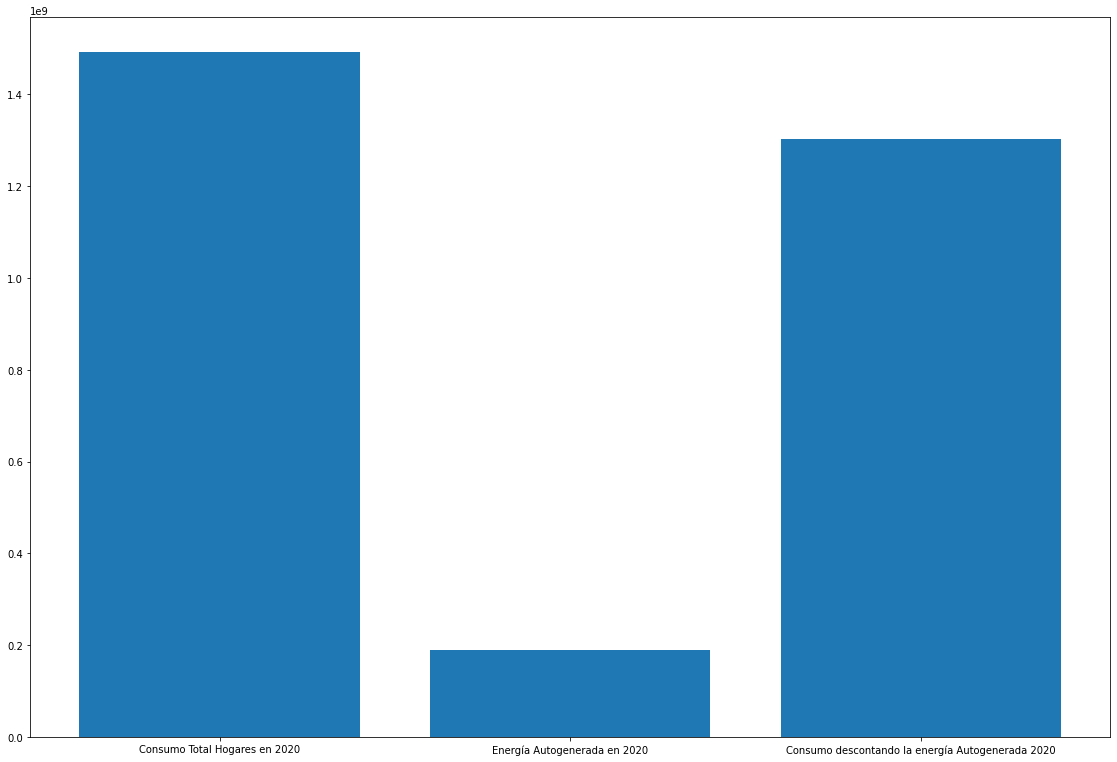

In [ ]:
#Pregunta 5

#Construir gráfico que muestre como se distribuye la cantidad de energía total consumida por los hogares en 2020


dist_energia = filtered_df_electricity.groupby('city')['annual_consume'].sum()

hogares=[]
consumo=[]


for x in dist_energia.iteritems():
    hogares.append(x[0])
    consumo.append(x[1])


totalconsumo=sum(consumo)


totalgen = filtered_df_electricity["self_production"].sum()


finalconsume = totalconsumo - totalgen 
print("Consumo 2020 - Energía generada 2020: ",finalconsume)

nombres=["Consumo Total Hogares en 2020","Energía Autogenerada en 2020", "Consumo descontando la energía Autogenerada 2020"]
consums=[totalconsumo,totalgen,finalconsume]

fig_managers_consume = plt.figure() #primero configuro el gráfico
ax= fig_managers_consume.add_axes([0,0,1,1]) #añado ejes x e y

ax.bar(nombres,consums)
plt.show()



Como se puede ver, el consumo total neto es menor al consumo total, ya que se le descuenta el total de energía autogenerada al total de energía consumida ese año.

##Pregunta 6

Considere las 3 ciudades con más conexiones y las 3 ciudades con menos conexiones durante 2020. Compare la distribución de la cantidad de energía auto-generada en esas 6 ciudades. ¿Depende esta variable del tamaño de la ciudad? ¿Existen en estas ciudades zonas con consumo auto-generado inusualmente pequeño o inusualmente grande?

Las 3 ciudades con mayor cantidad de conexiones en 2020 son:
>1. S'Gravenhage
>2. Amsterdam
>3. Rotterdam

y las 3 ciudades con menor cantidad de conexiones en 2020 son:
>1. Doniaga
>2. Langegijk
>3. Nederland

A continuación se muestra un gráfico que muestra la cantidad de energía autogenerada de estas ciudades

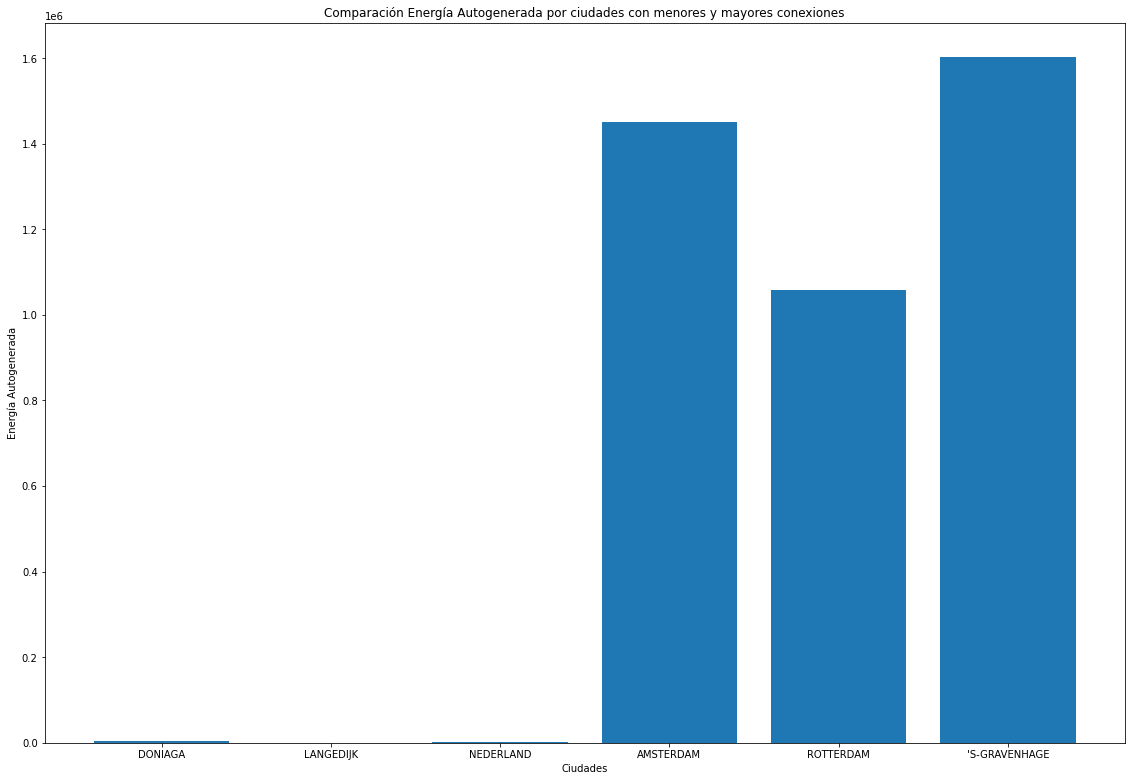

In [ ]:
#filtrar energia autogenerada por ciudades con  mayores y menores conexiones respectivamente, y añadir a lista
energia_autogenerada_mayores = []
filtered_df_electricity_autogen = filtered_df_electricity.groupby('city')['self_production'].sum()

for ciudad in names_mayores:
  energia_autogenerada_mayores.append(filtered_df_electricity_autogen[[ciudad]].values[0])

energia_autogenerada_menores = []
filtered_df_electricity_autogen = filtered_df_electricity.groupby('city')['self_production'].sum()

for ciudad in names_menores:
  energia_autogenerada_menores.append(filtered_df_electricity_autogen[[ciudad]].values[0])

#juntar toda la info para grafico
energia_autogenerada_total = []
for i in range(0, len(energia_autogenerada_menores)):
  energia_autogenerada_total.append(energia_autogenerada_menores[i])

for i in range(0, len(energia_autogenerada_mayores)):
  energia_autogenerada_total.append(energia_autogenerada_mayores[i])

names = []
for i in range(0, len(names_menores)):
  names.append(names_menores[i])

for i in range(0, len(names_mayores)):
  names.append(names_mayores[i])


fig_electricidad_energia_autogenerada = plt.figure()
ax= fig_electricidad_energia_autogenerada.add_axes([0,0,1,1]) 
ax.bar(names, energia_autogenerada_total)
plt.xlabel("Ciudades")
plt.ylabel("Energía Autogenerada")
plt.title("Comparación Energía Autogenerada por ciudades con menores y mayores conexiones")
plt.show()



Como se puede observar, la cantidad de energía autogenerada aumenta considerablemente en las ciudades con mayores conexiones.

Se obtuvieron los tamaños en km<sup>2</sup> de las ciudades en estudio de Wikipedia y están a continuación (de Doniaga no se pudo obtener información):



In [ ]:
for key in City_area:
  print(key + ":\t" + str(City_area[key]))

AMSTERDAM:	219.3
ROTTERDAM:	324.1
S-GRAVENHAGE:	98.13
LANGERDIJK:	27.03
NEDERLAND:	41.54


Se puede observar que las ciudades de menor tamaño son las que tienen menos conecciones e ídem para las ciudades de mayor tamaño. Con esto se puede concluir que sí depende el tamaño de la ciudad la cantidad de energía autogenerada y la cantidad de conexiones

##Pregunta 7

¿Existe una relación entre el consumo anual y la cantidad de conexiones de una ciudad? ¿Entre el consumo anual y la cantidad de energía auto-generada en la ciudad? 


A continuación se muestra un gráfico con el conusmo anual en las ciudades con menores y mayores conexiones:

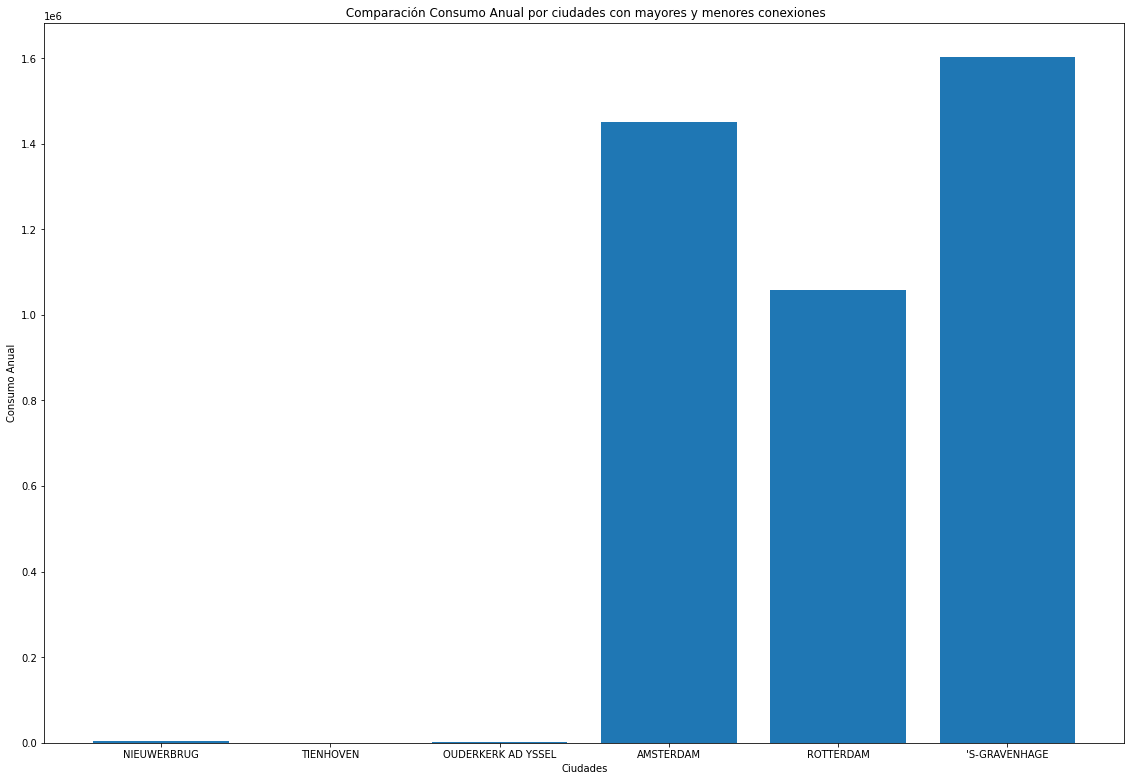

In [ ]:
#relacion entre consumo anual y cantidad de conexiones por ciudad
#como solo pregunta si hay una relacion, mejor analizar 3 ciudades con mayores conexiones y 3 ciudades con menores conexiones

mayor_conexiones_totales = df_electricity_consumo = df_electricity.groupby('city')['num_connections'].sum().nlargest(3)
menor_conexiones_totales = df_electricity_consumo = df_electricity.groupby('city')['num_connections'].sum().nsmallest(3)


#graficar consumo versus numero conexiones (lo mismo de la 6)

names_mayores=[]
names_menores=[]
for x in mayor_conexiones_totales.iteritems():
    names_mayores.append(x[0])
for x in menor_conexiones_totales.iteritems():
    names_menores.append(x[0])

consumo_anual_mayores = []
consumo_anual_menores = []
for ciudad in names_mayores:
  consumo_anual_mayores.append(mayor_conexiones_totales[[ciudad]].values[0])

for ciudad in names_menores:
  consumo_anual_menores.append(menor_conexiones_totales[[ciudad]].values[0])

consumo_anual_total = []
for i in range(0, len(consumo_anual_menores)):
  consumo_anual_total.append(energia_autogenerada_menores[i])

for i in range(0, len(consumo_anual_mayores)):
  consumo_anual_total.append(energia_autogenerada_mayores[i])

names = []
for i in range(0, len(names_menores)):
  names.append(names_menores[i])

for i in range(0, len(names_mayores)):
  names.append(names_mayores[i])


fig_electricidad_consumo_anual = plt.figure()
ax= fig_electricidad_consumo_anual.add_axes([0,0,1,1]) 
ax.bar(names, consumo_anual_total)
plt.xlabel("Ciudades")
plt.ylabel("Consumo Anual")
plt.title(" Comparación Consumo Anual por ciudades con mayores y menores conexiones")
plt.show()

Se puede observar que en las ciudades con mayores conexiones el consumo anual es mucho mayor, por lo cual se puede concluir que mientras más conexiones tenga una ciudad, más consumo anual de electricidad tiene.

Asimismo,a continuación se muestra un gráfico que compara la cantidad de energía autogenerada total en ciudades con menores y mayores conexiones: 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0, flags=flags)


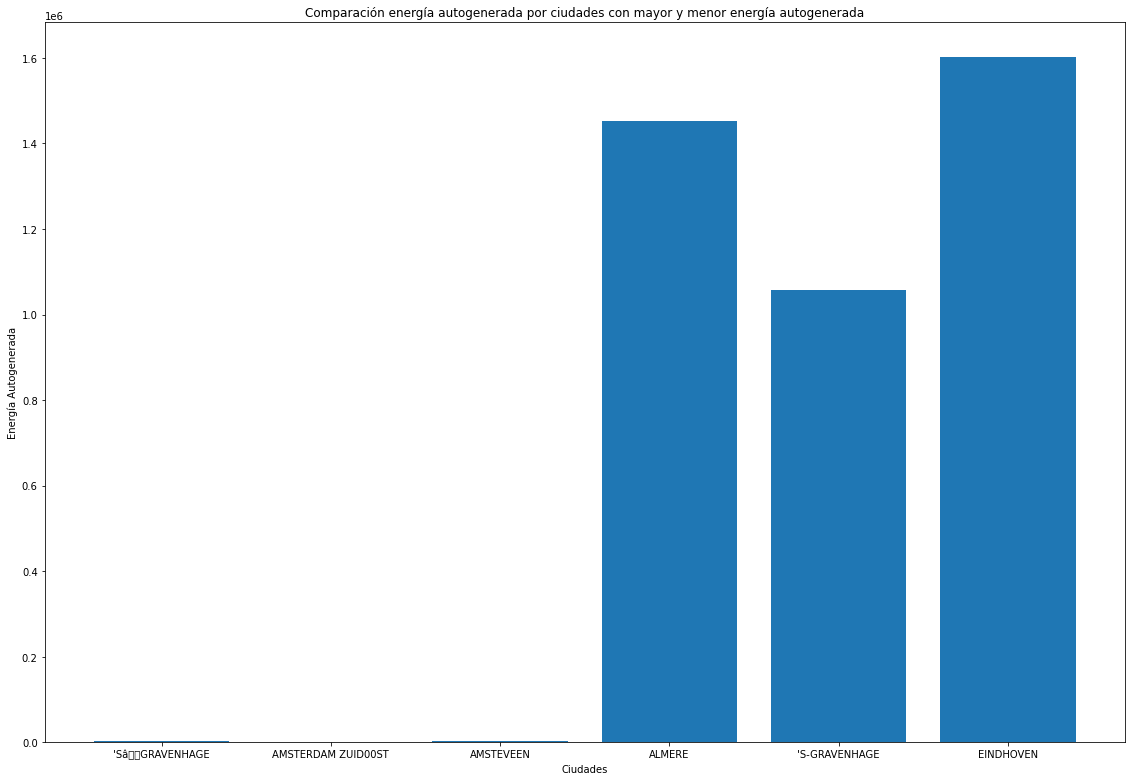

In [ ]:
#relacion entre consumo anual y cantida de energía autogenerada por ciudad
mayor_autogen_totales = df_electricity_consumo = df_electricity.groupby('city')['self_production'].sum().nlargest(3)
menor_autogen_totales = df_electricity_consumo = df_electricity.groupby('city')['self_production'].sum().nsmallest(3)


#graficar consumo versus numero conexiones(lo mismo que antes)

names_mayores=[]
names_menores=[]
for x in mayor_autogen_totales.iteritems():
    names_mayores.append(x[0])
for x in menor_autogen_totales.iteritems():
    names_menores.append(x[0])
energia_autogen_mayores = []
energia_autogen_menores = []
for ciudad in names_mayores:
  energia_autogen_mayores.append(mayor_autogen_totales[[ciudad]].values[0])

for ciudad in names_menores:
  energia_autogen_menores.append(menor_autogen_totales[[ciudad]].values[0])

energia_autogen_total = []
for i in range(0, len(energia_autogen_menores)):
  energia_autogen_total.append(energia_autogenerada_menores[i])

for i in range(0, len(energia_autogen_mayores)):
  energia_autogen_total.append(energia_autogenerada_mayores[i])

names = []
for i in range(0, len(names_menores)):
  names.append(names_menores[i])

for i in range(0, len(names_mayores)):
  names.append(names_mayores[i])

fig_electricidad_energia_autogenerada = plt.figure()
ax= fig_electricidad_energia_autogenerada.add_axes([0,0,1,1]) 
ax.bar(names, energia_autogen_total)
plt.xlabel("Ciudades")
plt.ylabel("Energía Autogenerada")
plt.title("Comparación energía autogenerada por ciudades con mayor y menor energía autogenerada")
plt.show()


Al igual que en el gráfico anterior, se puede observar que las ciudades con una mayor cantidad de conexiones tienen una cantidad de energía autogenerada considerablemente mayor que las ciudades con menos conexiones. Por lo cual, sí se observa  una relación.

##Pregunta 8
¿Está aumentado el consumo de gas en el país? ¿El consumo de electricidad? ¿Está aumentando o disminuyendo más un tipo de consumo que otro? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones. Comente lo que observa.


Graficos Electricidad
AMSTERDAM
[53900122.0, 54290067.0, 54305845.0, 54422131.0, 54733755.0, 55092954.0, 53253124.0, 55832552.0, 55438717.0, 55010230.0, 54836591.0, 54131139.0]
Consumo promedio: 54603935.583333336
Mediana de consumo: 54577943.0


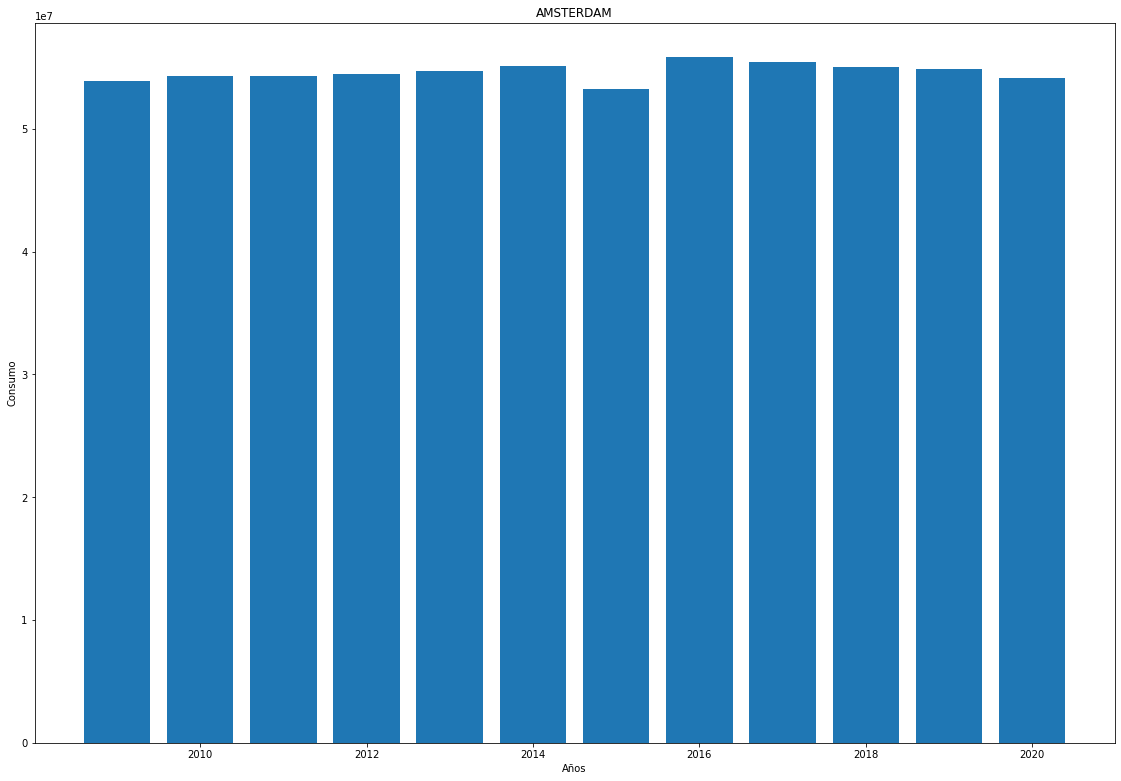

ROTTERDAM
[38022704.0, 38366903.0, 38584201.0, 38813483.0, 38490463.0, 38396624.0, 37320188.0, 36699445.0, 36398520.0, 36324022.0, 34124167.0, 36849610.36]
Consumo promedio: 37365860.86333334
Mediana de consumo: 37671446.0


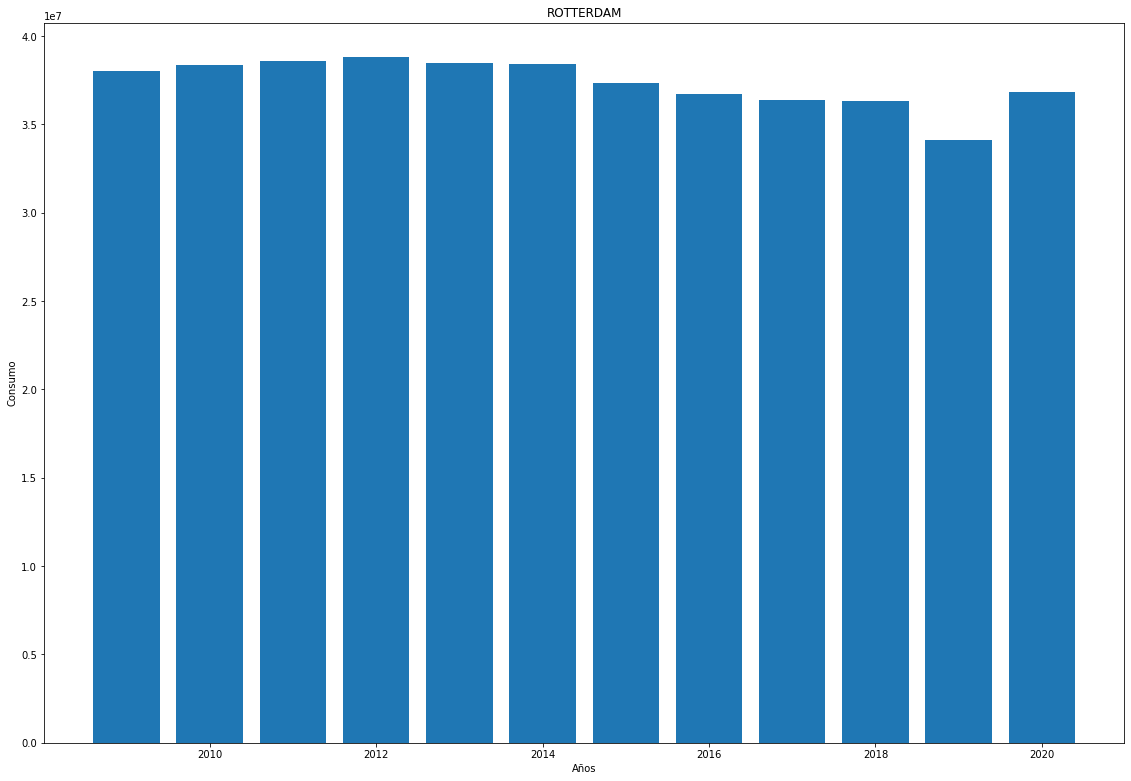

'S-GRAVENHAGE
[40573403.0, 40996950.0, 41290159.0, 41531382.0, 41187101.0, 41096176.0, 40013042.0, 39594997.0, 39570695.0, 40039600.0, 37661539.0, 38929772.62]
Consumo promedio: 40207068.05166667
Mediana de consumo: 40306501.5


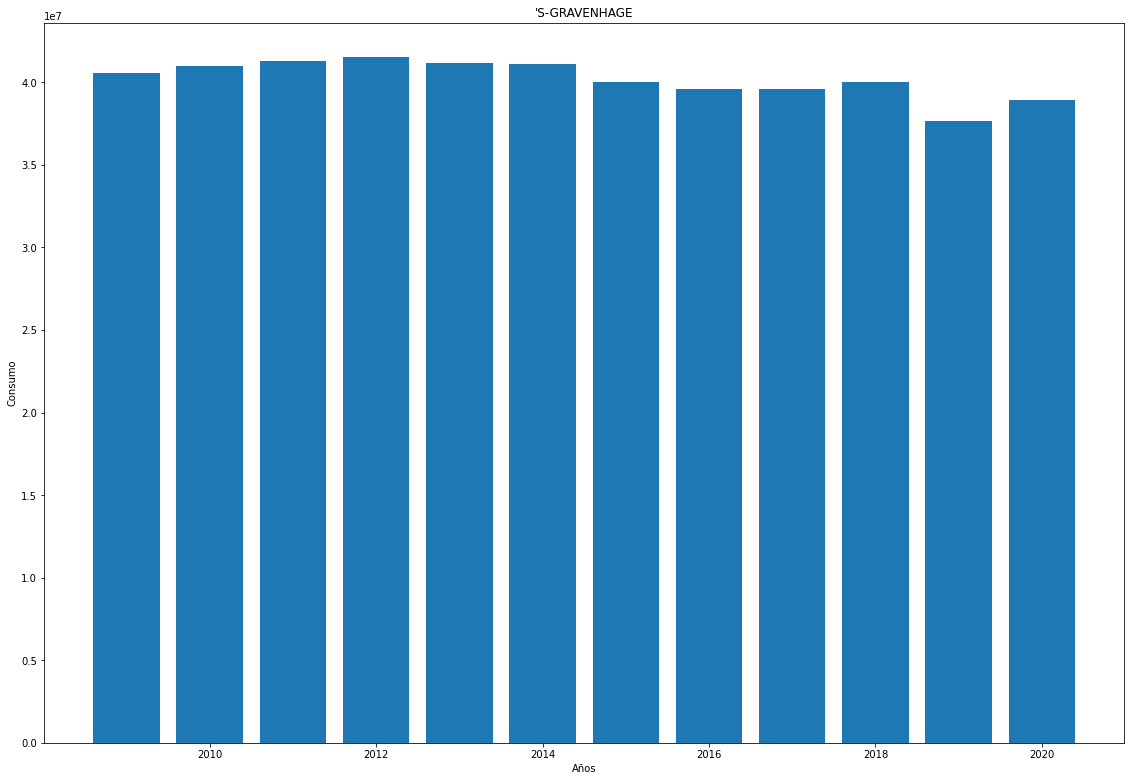

UTRECHT
[22037486.0, 22101713.0, 22366586.0, 22663271.0, 22588350.0, 22499621.0, 22298750.0, 22266926.0, 22225266.0, 22459675.0, 20207704.0, 22417999.89]
Consumo promedio: 22177778.99083333
Mediana de consumo: 22332668.0


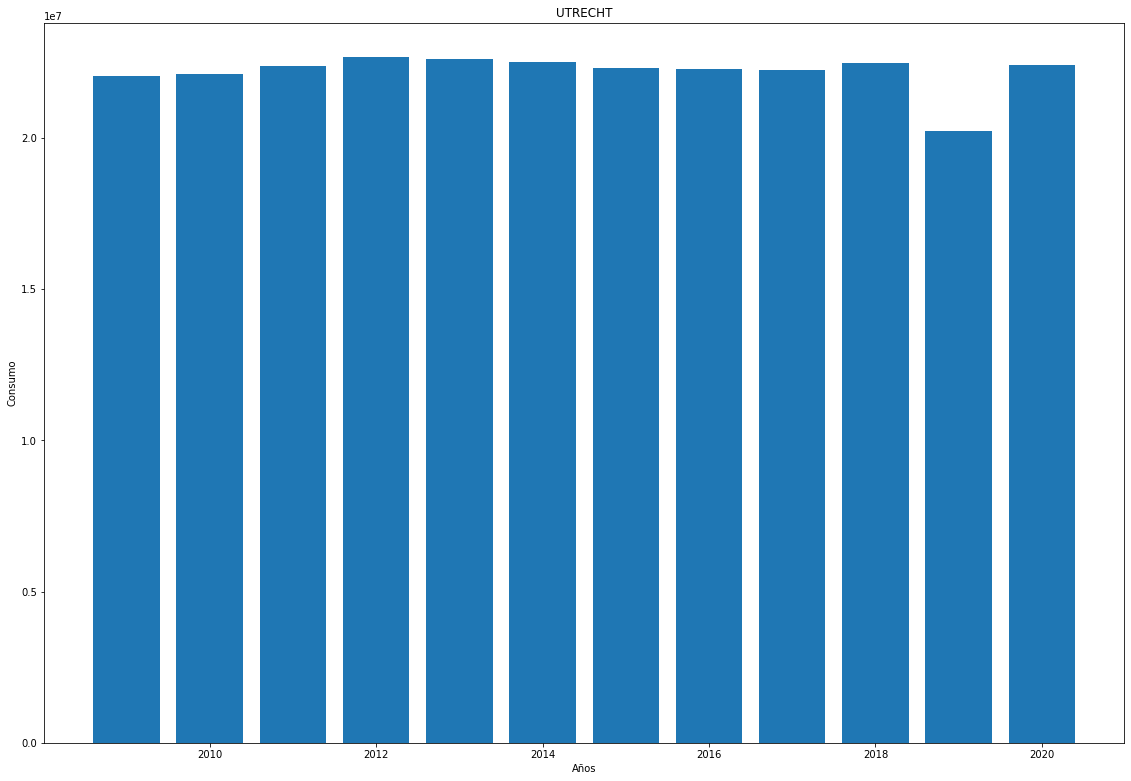

EINDHOVEN
[31510.0, 22508496.28, 23123389.35, 23120679.79, 18813329.0, 18376473.0, 17940352.0, 16989602.0, 17574828.49, 17252205.96, 16756973.8]
Consumo promedio: 17498894.51545455
Mediana de consumo: 17940352.0


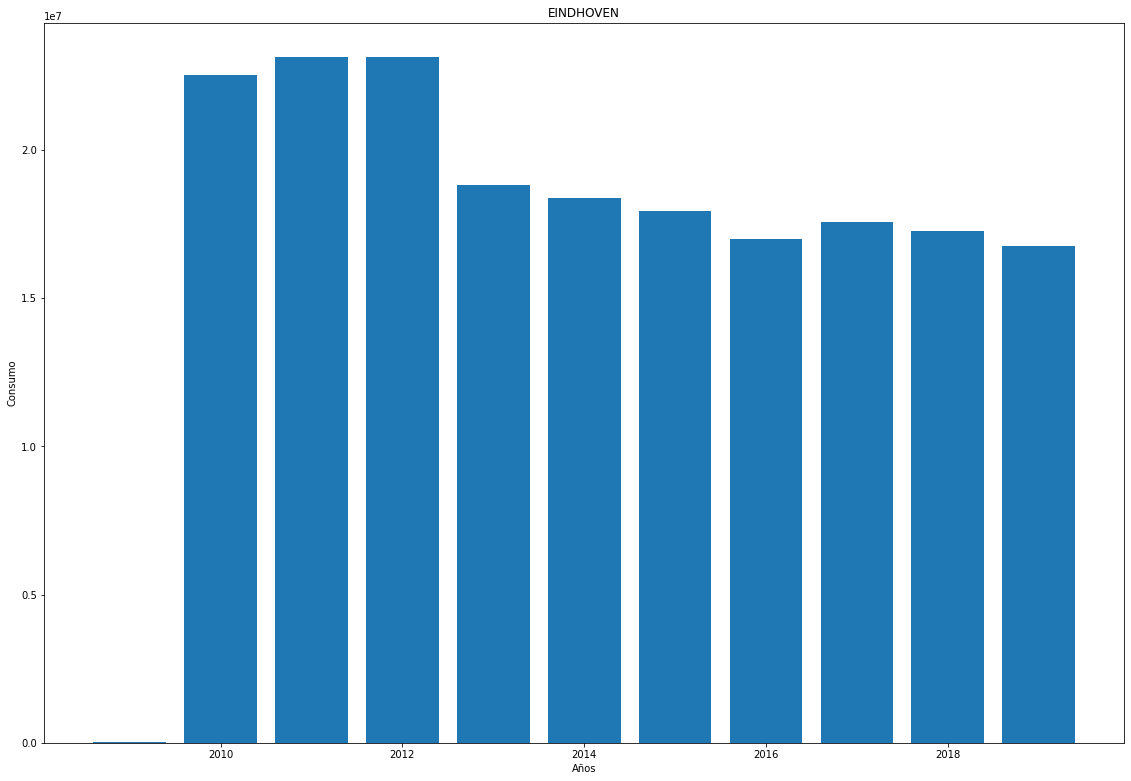

ALMERE
[18315331.0, 18736494.0, 19009259.0, 19212245.0, 19238127.0, 18724981.0, 18136934.0, 17774172.0, 17562872.0, 17436187.0, 17221147.0, 17405634.0]
Consumo promedio: 18231115.25
Mediana de consumo: 18226132.5


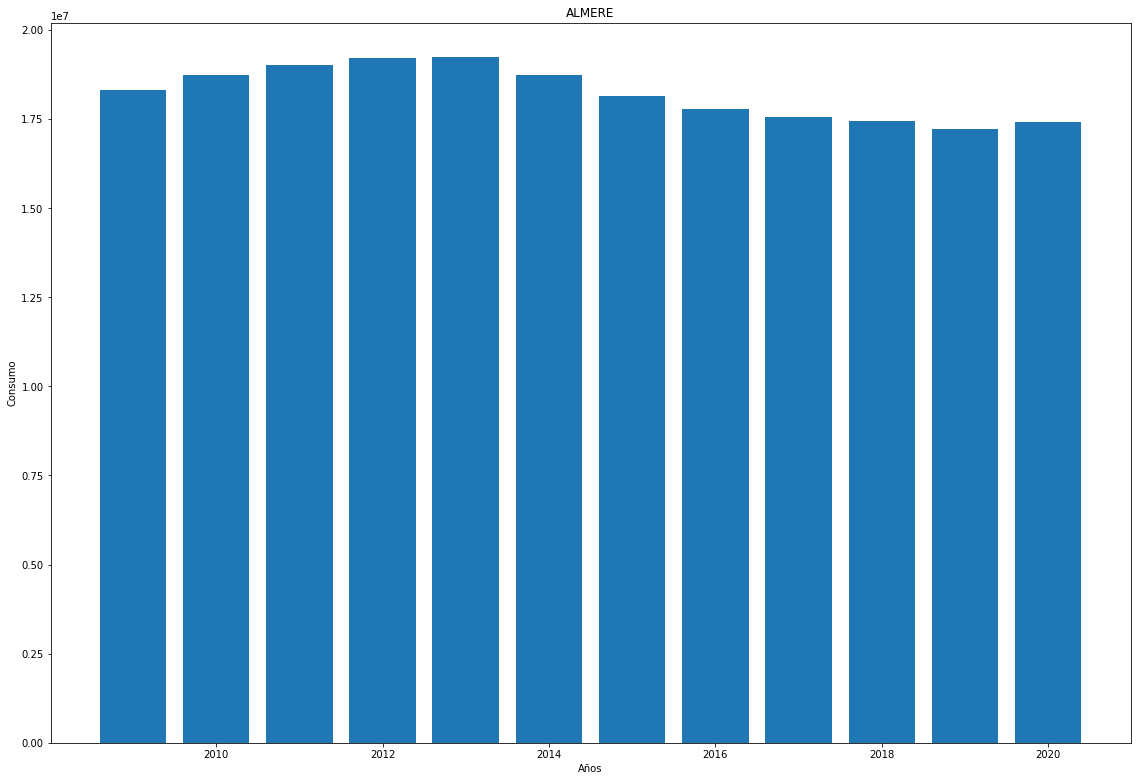

GRONINGEN
[15534663.0, 15711535.0, 15889435.0, 16246745.0, 16195745.0, 15743630.0, 15298791.0, 15054696.0, 16091276.29, 15674123.34, 15191849.26]
Consumo promedio: 15693862.626363635
Mediana de consumo: 15711535.0


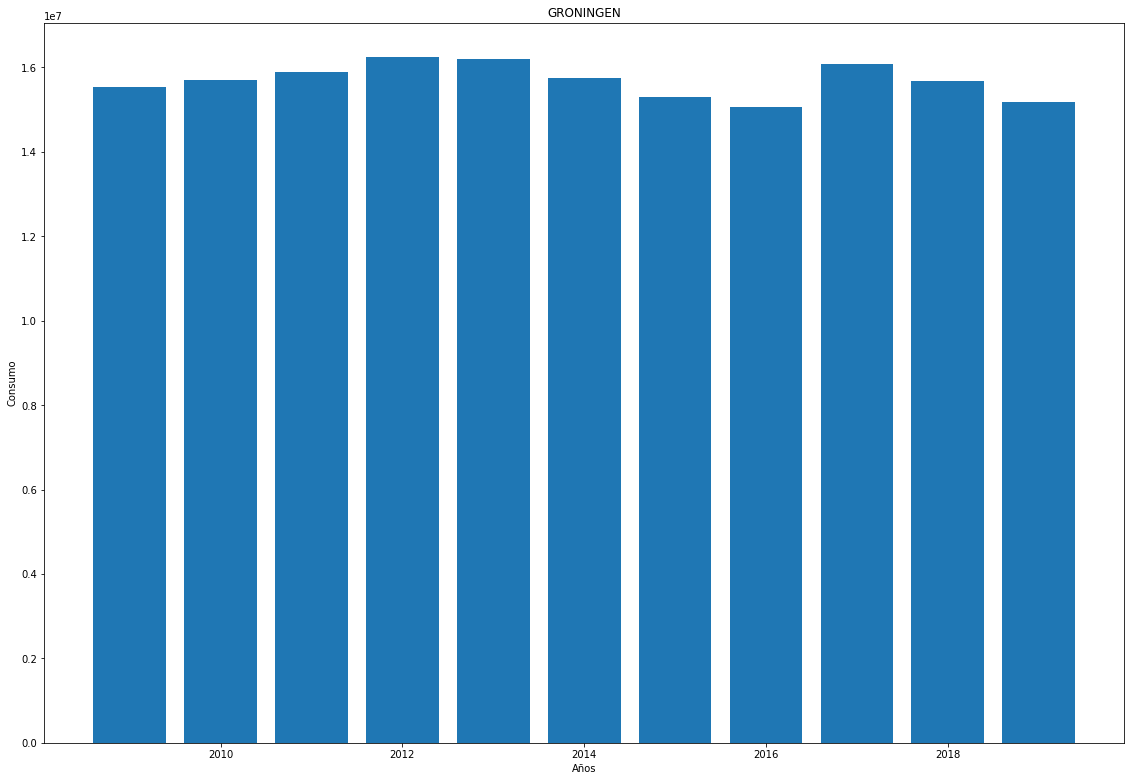

HAARLEM
[14283779.0, 14692314.0, 14426262.0, 14374937.0, 14252342.0, 14231936.0, 13752942.0, 13538146.0, 13298111.0, 13119663.0, 12966529.0, 12787640.11]
Consumo promedio: 13810383.425833335
Mediana de consumo: 13992439.0


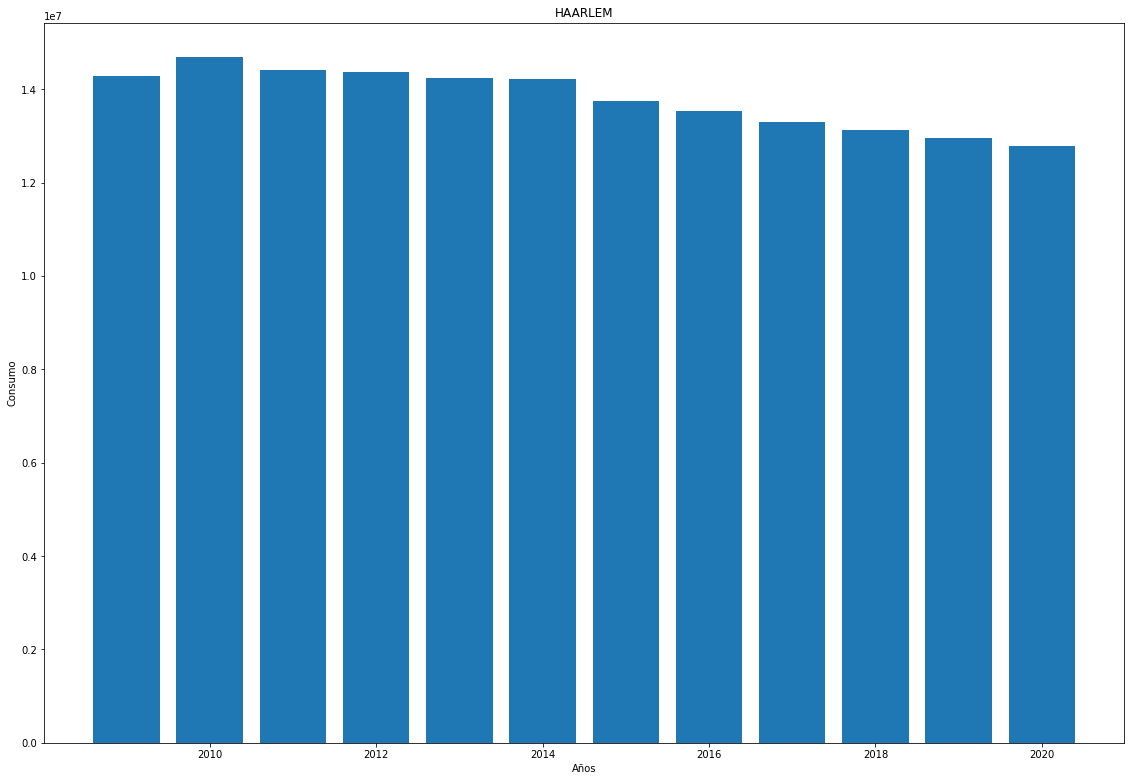

ARNHEM
[14655149.0, 14834824.0, 14782940.0, 14866795.0, 14662644.0, 14748359.0, 14233917.0, 14060190.0, 13910435.0, 13698976.0, 13505892.0, 13556341.0]
Consumo promedio: 14293038.5
Mediana de consumo: 14444533.0


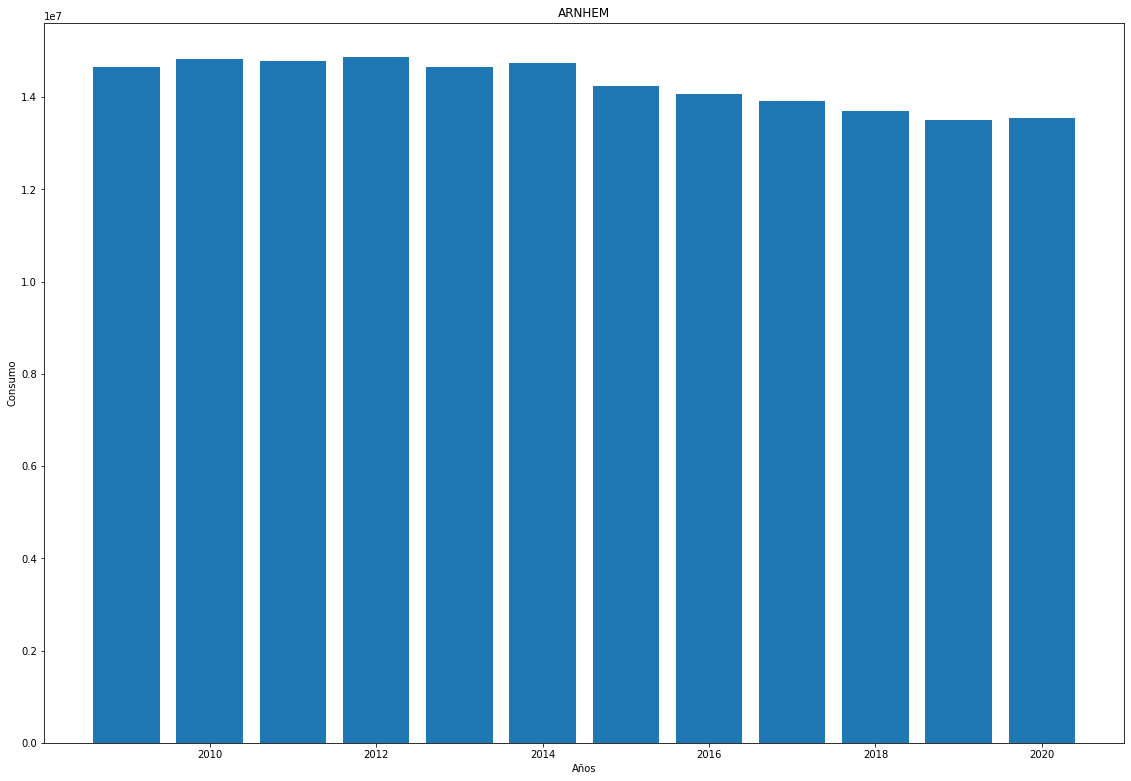

NIJMEGEN
[14321799.0, 14517535.0, 14485133.0, 14613953.0, 14633098.0, 14354127.0, 13871545.0, 13755818.0, 13527664.0, 13418777.0, 13213396.0, 13145674.0]
Consumo promedio: 13988209.916666666
Mediana de consumo: 14096672.0


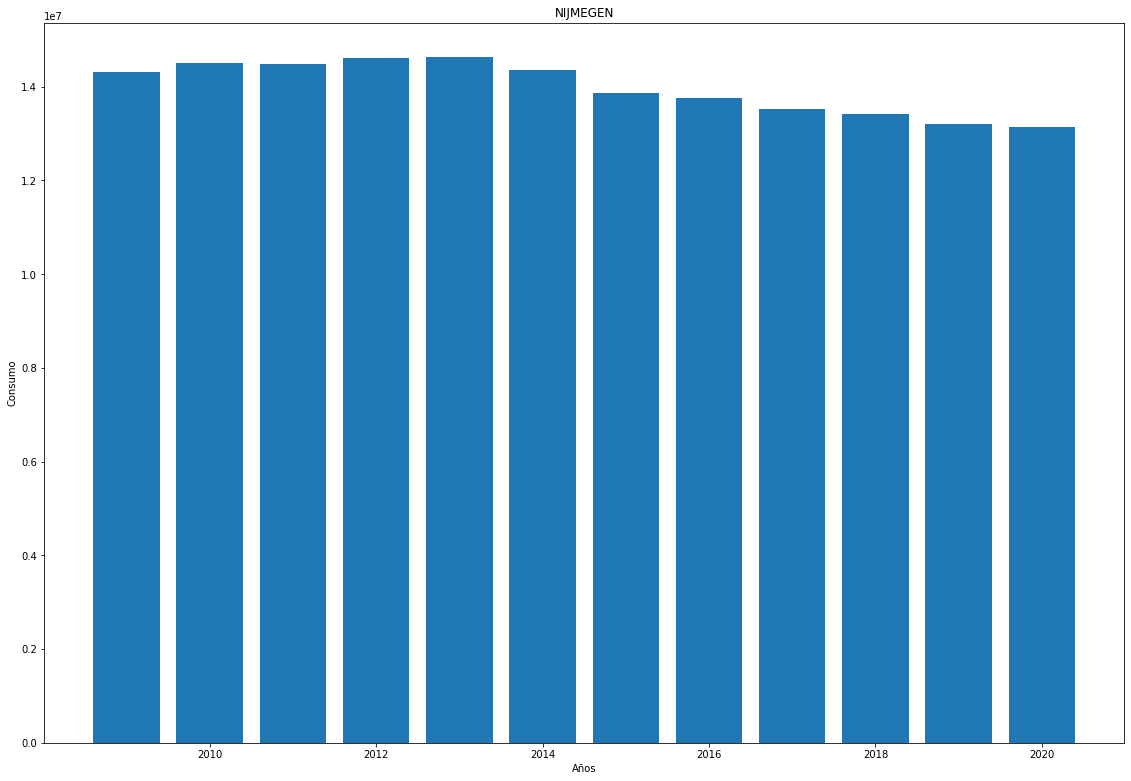

Graficos de Gas
AMSTERDAM
[21207890.0, 20709331.0, 20519046.0, 20092209.0, 19729478.0, 19611220.0, 19045143.0, 19692292.0, 19843106.0, 19872346.0, 19756096.0, 19702249.87]
Consumo promedio: 19981700.5725
Mediana de consumo: 19799601.0


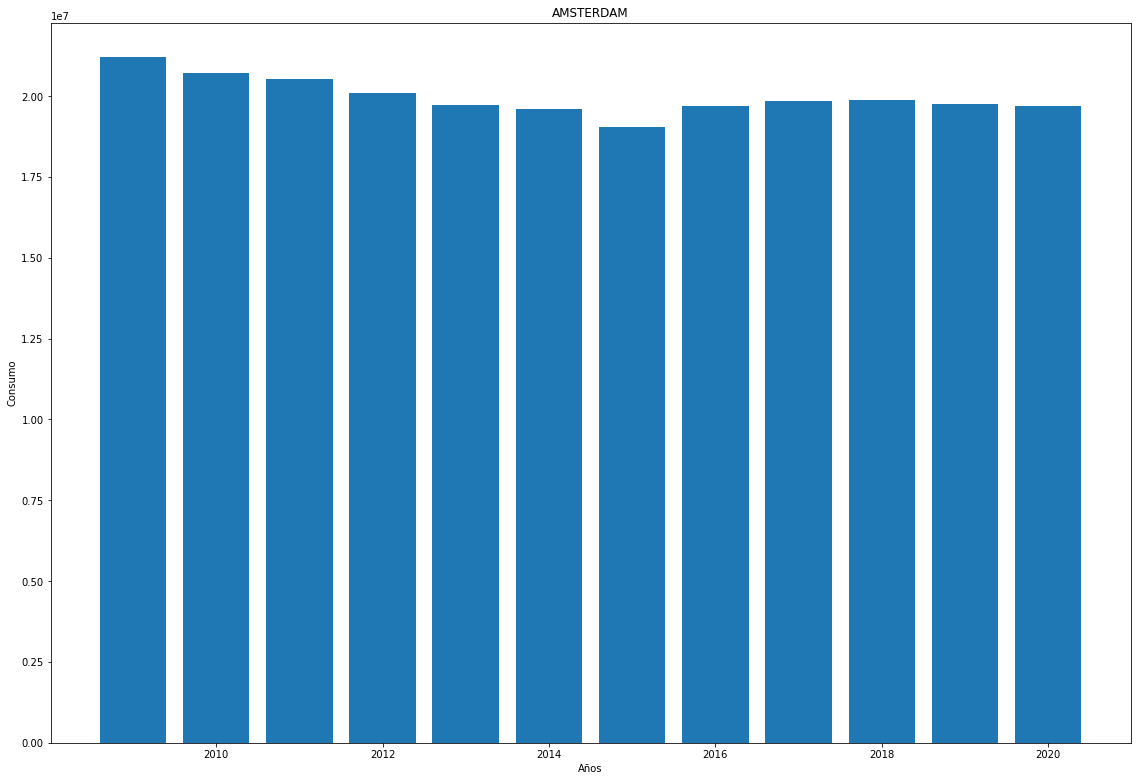

ROTTERDAM
[12563632.0, 12618760.0, 12647799.0, 12666962.0, 12539960.0, 12512475.0, 12138757.0, 11872631.0, 11692522.0, 11706957.0, 11286191.0, 12384871.48]
Consumo promedio: 12219293.123333333
Mediana de consumo: 12448673.24


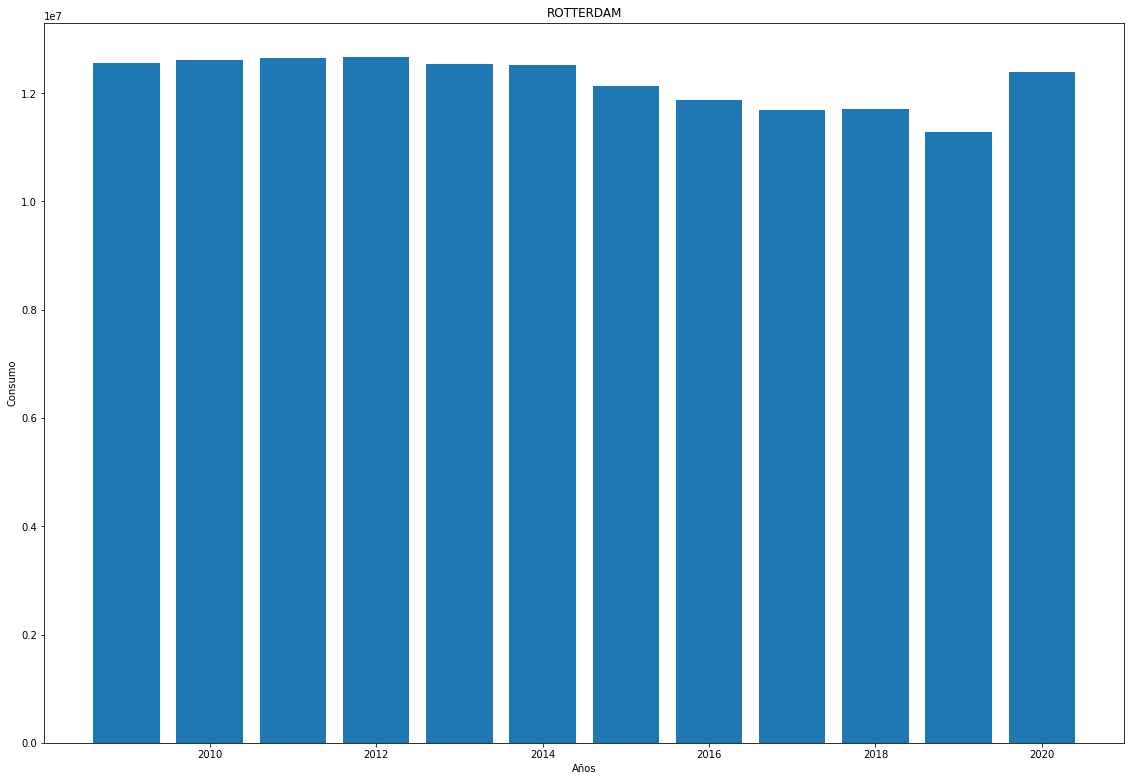

'S-GRAVENHAGE
[15939257.0, 16008771.0, 16066621.0, 16096740.0, 15989971.0, 15817468.0, 15460995.0, 15090381.0, 14924300.0, 14885237.0, 14591159.0, 15504119.23]
Consumo promedio: 15531251.6025
Mediana de consumo: 15660793.615


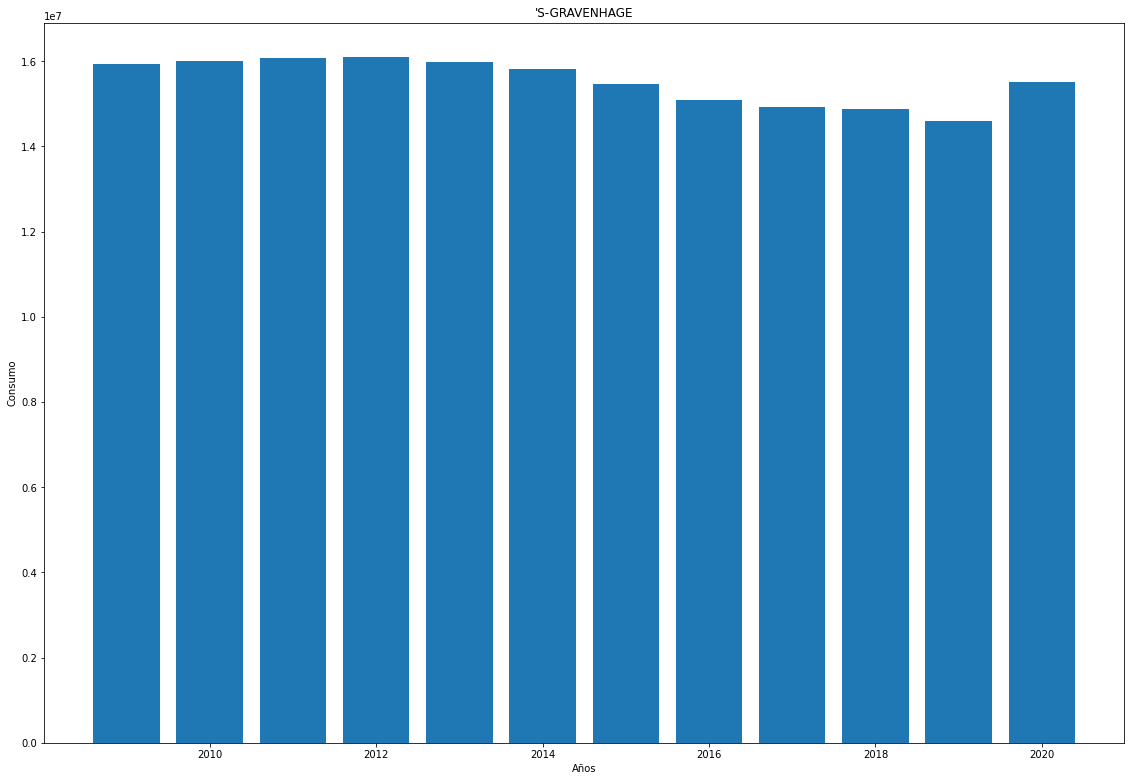

UTRECHT
[6837651.0, 6844306.0, 6877673.0, 6888805.0, 6819265.0, 6710837.0, 6516955.0, 6403335.0, 6378539.0, 6374412.0, 6080642.0, 6721954.06]
Consumo promedio: 6621197.838333334
Mediana de consumo: 6716395.529999999


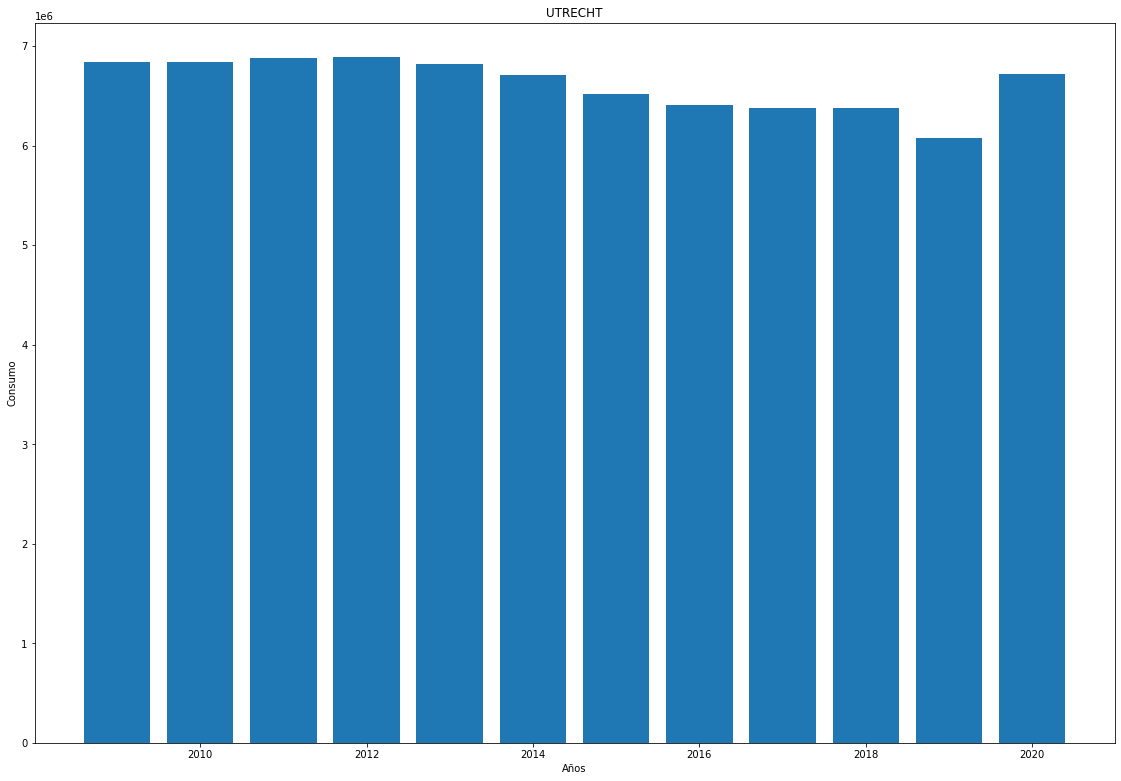

GRONINGEN
[7272815.0, 7441253.0, 7404471.0, 7552584.0, 7380296.0, 7188979.0, 6910605.0, 6924815.0, 7438972.99, 7378377.88, 7243571.37]
Consumo promedio: 7285158.203636364
Mediana de consumo: 7378377.88


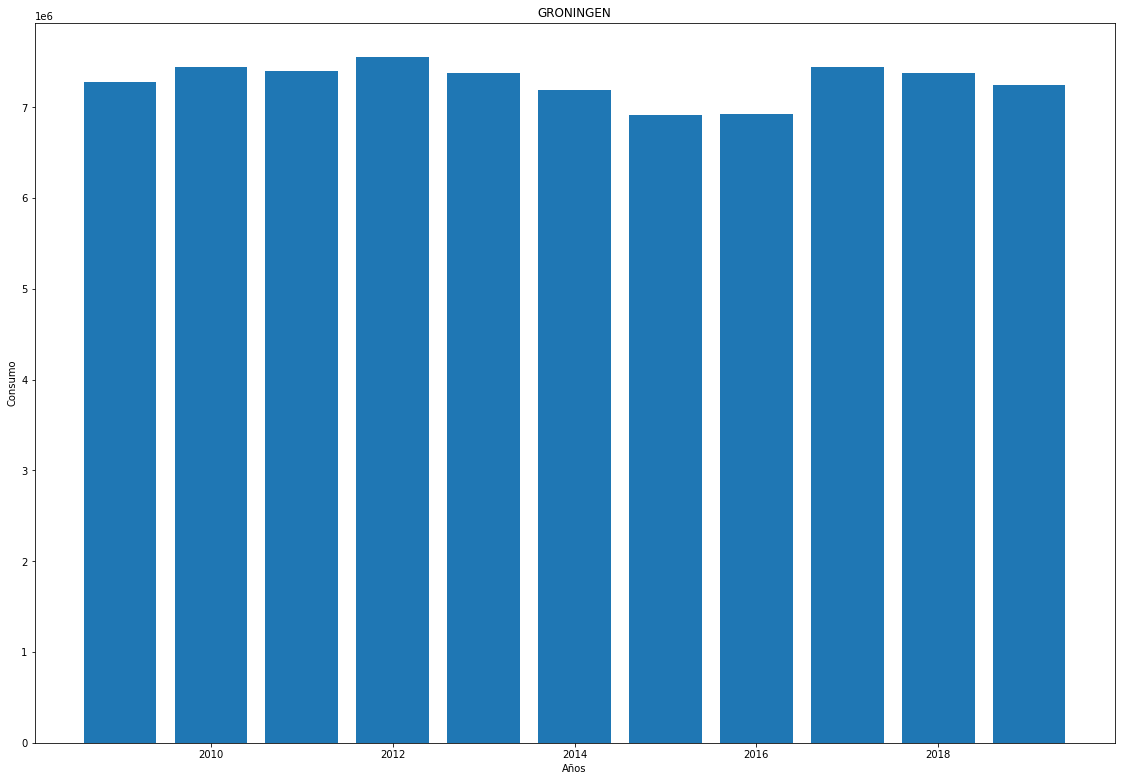

EINDHOVEN
[4372791.67, 4255502.18, 3883886.35, 7650197.0, 7350876.0, 7287720.0, 7065519.0, 7668966.95, 7563161.33, 7459107.74]
Consumo promedio: 6455772.822
Mediana de consumo: 7319298.0


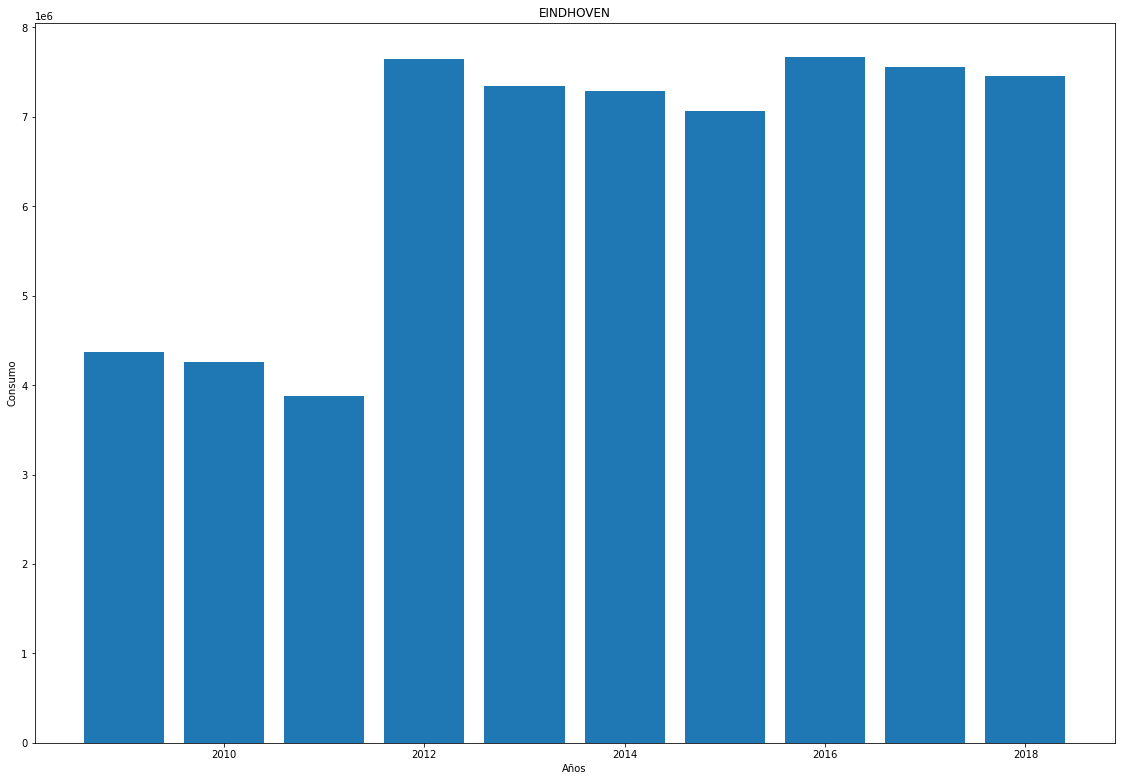

HAARLEM
[6399395.0, 6219559.0, 6166967.0, 6160421.0, 5943486.0, 5876916.0, 5658199.0, 5504080.0, 5410221.0, 5403761.0, 5413464.0, 5376998.95]
Consumo promedio: 5794455.662500001
Mediana de consumo: 5767557.5


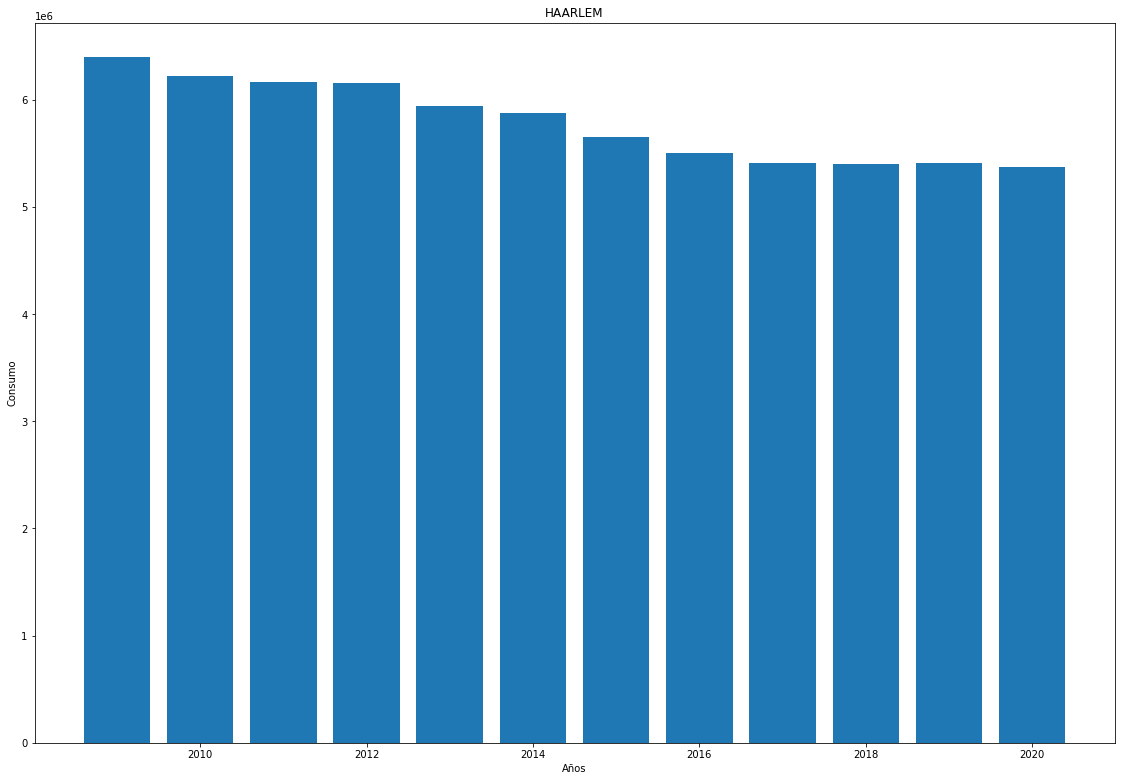

NIJMEGEN
[5874427.0, 5799772.0, 5736502.0, 5637881.0, 5404802.0, 5416871.0, 5211831.0, 5202205.0, 5125131.0, 5227920.0, 5144851.0, 5072978.0]
Consumo promedio: 5404597.583333333
Mediana de consumo: 5316361.0


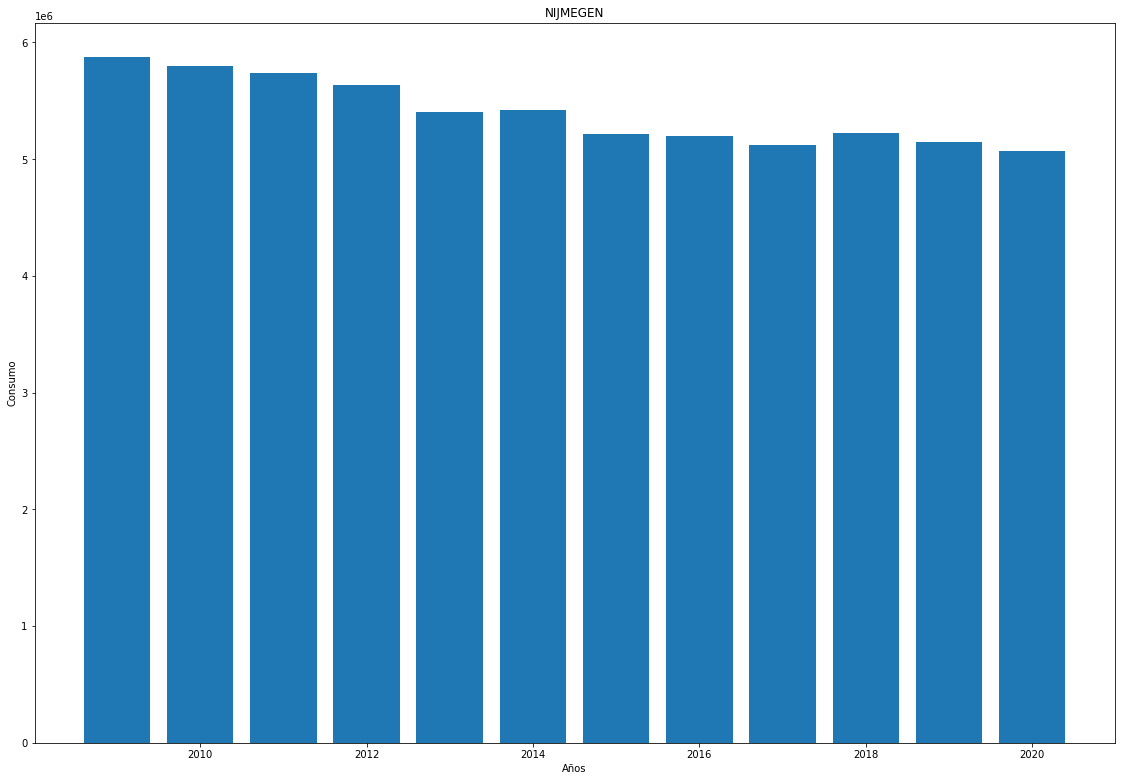

ARNHEM
[5701222.0, 5628304.0, 5529513.0, 5438764.0, 5262322.0, 5262173.0, 5052668.0, 5001730.0, 4958783.0, 5016630.0, 4913546.0, 4891416.0]
Consumo promedio: 5221422.583333333
Mediana de consumo: 5157420.5


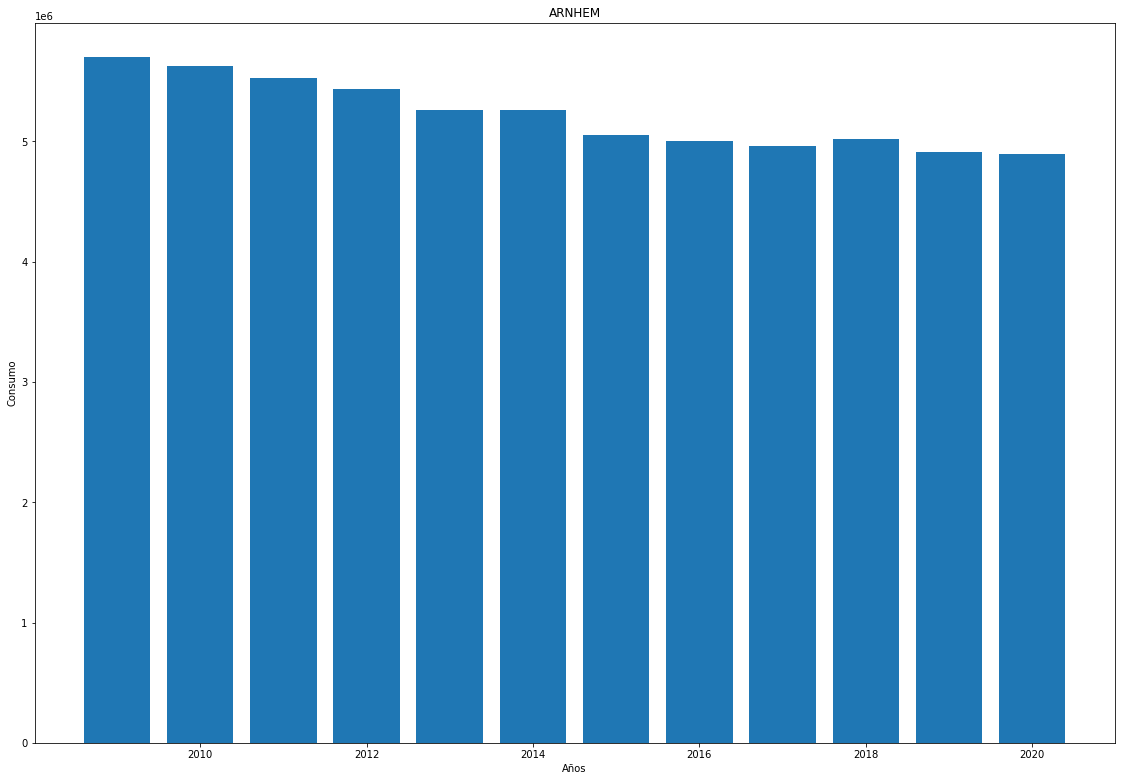

APELDOORN
[5649441.0, 5612509.0, 5543395.0, 5450559.0, 5315645.0, 5199140.0, 4848821.0, 4928410.0, 4938590.0, 4989481.0, 4895762.0, 4844796.0]
Consumo promedio: 5184712.416666667
Mediana de consumo: 5094310.5


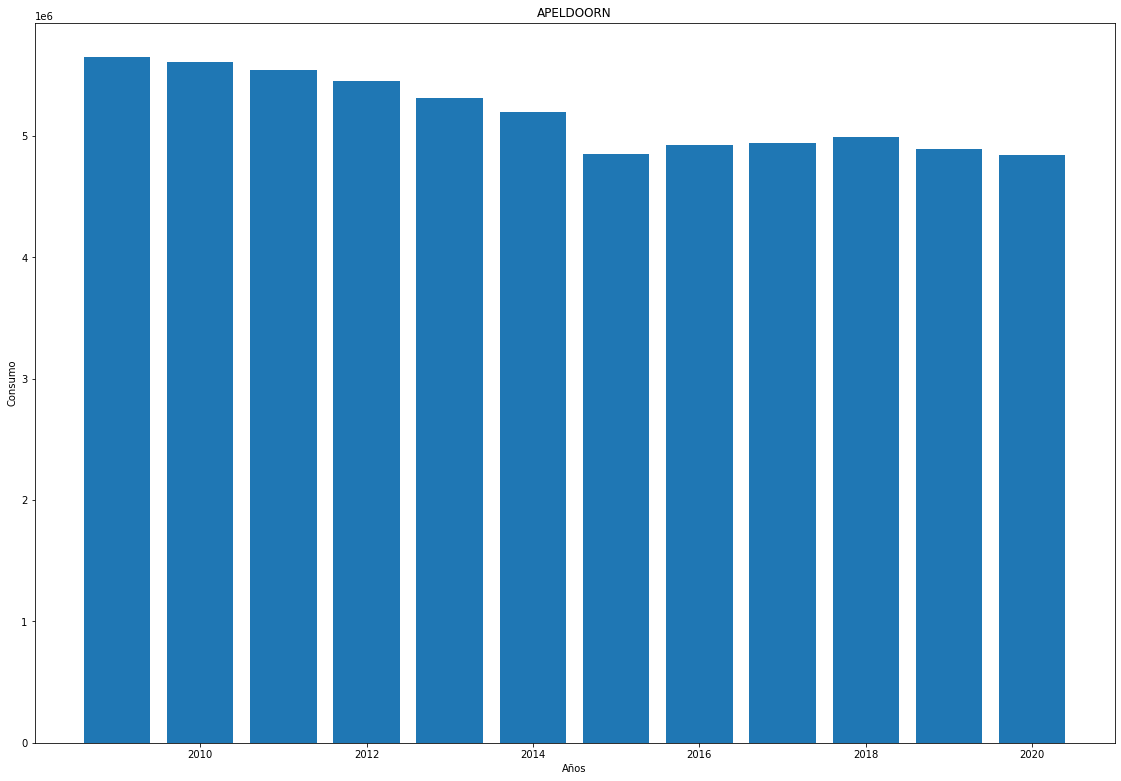

In [ ]:
#¿Está aumentado el consumo de gas en el país? ¿El consumo de electricidad? ¿Está aumentando o disminuyendo más un tipo de consumo que otro? 
#Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. 
#Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones. Comente lo que observa.


#P8


#Filtrado electricidad

e_2009 = df_electricity['year'] == 2009
e_2010 = df_electricity['year'] == 2010
e_2011 = df_electricity['year'] == 2011
e_2012 = df_electricity['year'] == 2012
e_2013 = df_electricity['year'] == 2013
e_2014 = df_electricity['year'] == 2014
e_2015 = df_electricity['year'] == 2015
e_2016 = df_electricity['year'] == 2016
e_2017 = df_electricity['year'] == 2017
e_2018 = df_electricity['year'] == 2018
e_2019 = df_electricity['year'] == 2019
e_2020 = df_electricity['year'] == 2020

filtrados_E=[e_2009,e_2010,e_2011,e_2012,e_2013,e_2014,e_2015,e_2016,e_2017,e_2018,e_2019,e_2020]


#Filtrado gas
g_2009 = df_gas['year'] == 2009
g_2010 = df_gas['year'] == 2010
g_2011 = df_gas['year'] == 2011
g_2012 = df_gas['year'] == 2012
g_2013 = df_gas['year'] == 2013
g_2014 = df_gas['year'] == 2014
g_2015 = df_gas['year'] == 2015
g_2016 = df_gas['year'] == 2016
g_2017 = df_gas['year'] == 2017
g_2018 = df_gas['year'] == 2018
g_2019 = df_gas['year'] == 2019
g_2020 = df_gas['year'] == 2020

filtrados_G=[g_2009,g_2010,g_2011,g_2012,g_2013,g_2014,g_2015,g_2016,g_2017,g_2018,g_2019,g_2020]

conexiones_electric = df_electricity_consumo = df_electricity.groupby('city')['num_connections'].sum().nlargest(10)

conexiones_gas      = df_gas_consumo         = df_gas.groupby('city')['num_connections'].sum().nlargest(10)

nombres_electro=[]
nombres_gas=[]

#Top 10 ciudades con mayor consumo electrico
for x in conexiones_electric.iteritems():
    nombres_electro.append(x[0])

#Top 10 ciudades con mayor consumo de gas
for x in conexiones_gas.iteritems():
    
    nombres_gas.append(x[0])


peryear={}

for x in nombres_electro:
    lista_consumoanual=[]
    for y in filtrados_E:
        city_peryear=df_electricity[y]
       
        consumo_anual= city_peryear.groupby('city')['annual_consume'].sum()
       

        for t in consumo_anual.iteritems():
            

            if t[0]==x:
                lista_consumoanual.append(t[1])
                
                
           
    peryear[x]=lista_consumoanual


peryear_g={}

for x in nombres_gas:
    lista_consumoanual=[]
    
    for y in filtrados_G:
        city_peryear=df_gas[y]
        consumo_anual= city_peryear.groupby('city')['annual_consume'].sum()

        for t in consumo_anual.iteritems():
           
            if t[0]==x:
                lista_consumoanual.append(t[1])

    peryear_g[x]=lista_consumoanual


    
years=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]



#Electricidad
print("Graficos Electricidad")
for ciudad,consumos in peryear.items():
    fig_electros= plt.figure()
    ax = fig_electros.add_axes([0,0,1,1])
    print(ciudad)

    if ciudad== "EINDHOVEN" or ciudad=="GRONINGEN" :
        years2=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
        print(consumos)
        print("Consumo promedio:",np.mean(consumos))
        print("Mediana de consumo:",np.median(consumos))
        ax.bar(years2,consumos)
        plt.xlabel("Años")
        plt.ylabel("Consumo")
        plt.title(ciudad)
        plt.show()

    else:
        print(consumos)
        print("Consumo promedio:",np.mean(consumos))
        print("Mediana de consumo:",np.median(consumos))
        ax.bar(years,consumos)
        plt.xlabel("Años")
        plt.ylabel("Consumo")
        plt.title(ciudad)
        plt.show()

#Gas

print("Graficos de Gas")
for ciudad,consumos in peryear_g.items():
    fig_gas= plt.figure()
    ax = fig_gas.add_axes([0,0,1,1])
    print(ciudad)
   
    
    if ciudad=="GRONINGEN" :
        years2=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
        print(consumos)
        print("Consumo promedio:",np.mean(consumos))
        print("Mediana de consumo:",np.median(consumos))
        ax.bar(years2,consumos)
        plt.xlabel("Años")
        plt.ylabel("Consumo")
        plt.title(ciudad)
        plt.show()

    elif ciudad=="EINDHOVEN" :
        years2=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
        print(consumos)
        print("Consumo promedio:",np.mean(consumos))
        print("Mediana de consumo:",np.median(consumos))
        ax.bar(years2,consumos)
        plt.xlabel("Años")
        plt.ylabel("Consumo")
        plt.title(ciudad)
        plt.show()
    else:
        print(consumos)
        print("Consumo promedio:",np.mean(consumos))
        print("Mediana de consumo:",np.median(consumos))
        ax.bar(years,consumos)
        plt.xlabel("Años")
        plt.ylabel("Consumo")
        plt.title(ciudad)
        plt.show()



In [ ]:
#Escribí esto muy noche, intenta doble checkear las unidades(M de millones y K es de miles, yo creo que trolíe más de una)
#La electricidad se mide en  KW/h(kilo-watts por hora) y el gas es m^3 
#En general se puede concluir que sacando algunas ciudades selectas, el consumo se ha mantenido bastante estable, en algunos casos ha subido dramáticamente de un año a otro
# y en otros casos se ha logrado disminuir con el paso de los años.

Electricidad($Kw/h$):\
    Amsterdam: El consumo baja ligeramente de 55.8[Millones] a 54.1[Millones]
    \
    Rotterdam:Se mantiene más o menos en el mismo nivel con el paso de los años, esta en el orden de los millones\
    S-Gravenhage: Baja ligeramente con el paso de los años, sigue en el orden de los millones\
    Utrecht: No se observan grandes variaciones de consumo en el periodo analizado\
    Eindhoven: Disminuye con el paso del tiempo, pasa
    de los 31[Mil] de consumo a 23[Millones], para 
    luego bajar denuevo a 18.8[Millones] en 2013
    y terminar en 17.9 Millones en 2018\
    Almere: Se mantiene cerca de una media de 18.4[Millones] de consumo\
    Groningen: Ligeras variaciones con el paso de los años,
    pero se mantiene con una media de 15.7[Millones] y con un máximo de 162[Millones] en 2012\
    HAARLEM: Con el paso de los años ha descendido
    de 14.6[Millones] en 2010 a 13.8[Millones] en 2020\
    ARNHEM: Hay un descenso leve desde 2014 con 14.7[Millones] a 
    2020 con 13.5[Millones]\
    NIJMEGEN: Tuvo un Peak de consumo en 2013 con 14.6[Millones] y 
    desde entonces ha descendido gradualmente hasta 13.1[Millones] en 2020

Gas($M^3$):\
  AMSTERDAN: Ligero descenso ya que inicia con 21Millones y tiene una media de 19[Millones]\
ROTTERDAM:Descenso en consumo entre 2014-2020\
S-Gravenhage: desde 2012 hasta 2019 presenta un ligero descenso, luego repunta en 15[Millones] en 2020\
Utrecht: descenso 2012-2019 cerrando en 6M, en 2020 consumìo 6.7[Millones]\
Groningem: Millones, presenta una curva de descenso entre 2012 y 2016 y luego una segunda curva de descenso entre 2017-2019\
EINDHOVEN: Millones, primer descenso entre 2009 y 2010 cerrando en 3.8M, luego un repunte en 
2013 con 7.6M y una curva de descenso desde dicho año hasta 2016 cerrando en 7Millones, luego un
tercer repunte en 2016 de 7.6 millones y otro descenso ligero hasta 2018 cerrando en 7.2M\
Haarlem:Inicia 2009 con 6.3M de consumo y disminuye cada año, cerrando 2020 con 5.3M en consumo\
NIJMEGEN: Inicia sobre los 5.8M y disminuye hasta 2020 cerrando cerca de los 5M de consumo\
ARNHEM:Inicia en 2009 sobre los 5.7M y el consumo desciende cada año, cerrando el 2020 con cerca de 4.8M en consumo.\
APELDOORN:Inicia 2009 con un consumo de 5.6M el cual desciende cada año, cerrando el 2020 con 4.8M en consumo\



##Pregunta 9
¿Está aumentado la cantidad de energía auto-generada en el país? Para abordar esta pregunta, desagregue los datos por año y ciudad, presentando gráficos que permitan comparar fácilmente tanto tendencia como dispersión. Limítese a estudiar lo que sucede en las 10 ciudades con más conexiones.  Comente lo que observa.

A continuación se muestra cómo ha ido aumentando la energía eléctrica autogenerada en las 10 ciudades con mayores conexiones:

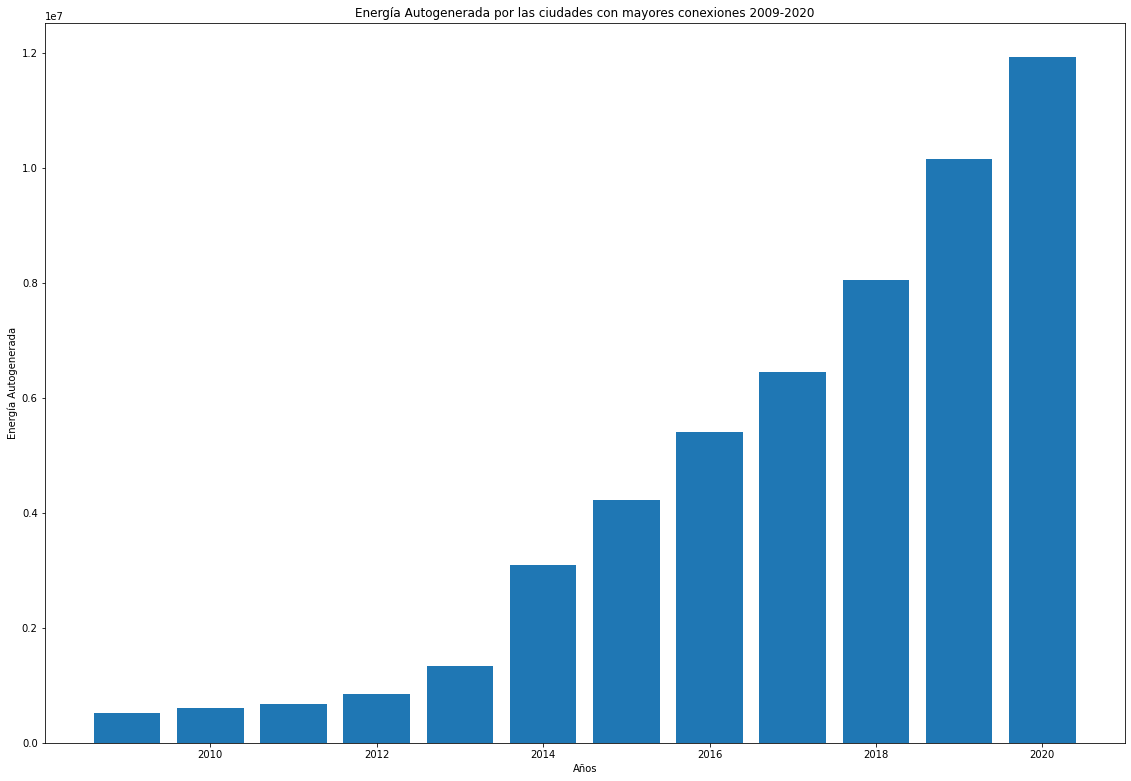

In [ ]:
#sumar energia autogenerada de las 10 ciudades con más conexiones durante los años
df_electricity[df_electricity['city'] == 'EINDHOVEN']
peryear={}
for x in nombres_electro:
    lista_energia_autogenerada=[]
    for y in filtrados_E:
        city_peryear=df_electricity[y]
       
        consumo_anual= city_peryear.groupby('city')['self_production'].sum()
       

        for t in consumo_anual.iteritems():
            

            if t[0]==x:
                lista_energia_autogenerada.append(t[1])
                
                
           
    peryear[x]=lista_energia_autogenerada

peryear['GRONINGEN'].append(0)

energia_autogen_total = [0,0,0,0,0,0,0,0,0,0,0,0]


for ciudad in peryear:
  for i in range(0, 12):
    if i ==1:
      peryear['EINDHOVEN'].insert(0,0)
    energia_autogen_total[i] = energia_autogen_total[i] + peryear[ciudad][i]
   
   
fig_electricidad_energia_autogenerada = plt.figure()
ax= fig_electricidad_energia_autogenerada.add_axes([0,0,1,1]) 
ax.bar(years, energia_autogen_total)
plt.xlabel("Años")
plt.ylabel("Energía Autogenerada")
plt.title("Energía Autogenerada por las ciudades con mayores conexiones 2009-2020")
plt.show()


Se puede observar que claramente ha ido en aumento la cantidad de energía autogenerada en el país

##Pregunta 10

Proponga y desarrolle un análisis libre que no haya sido cubierto y que esté relacionada al objetivo del cliente (saber en qué empresas o ciudades o tipos de conexion invertir). Resuma también las principales conclusiones del estudio.


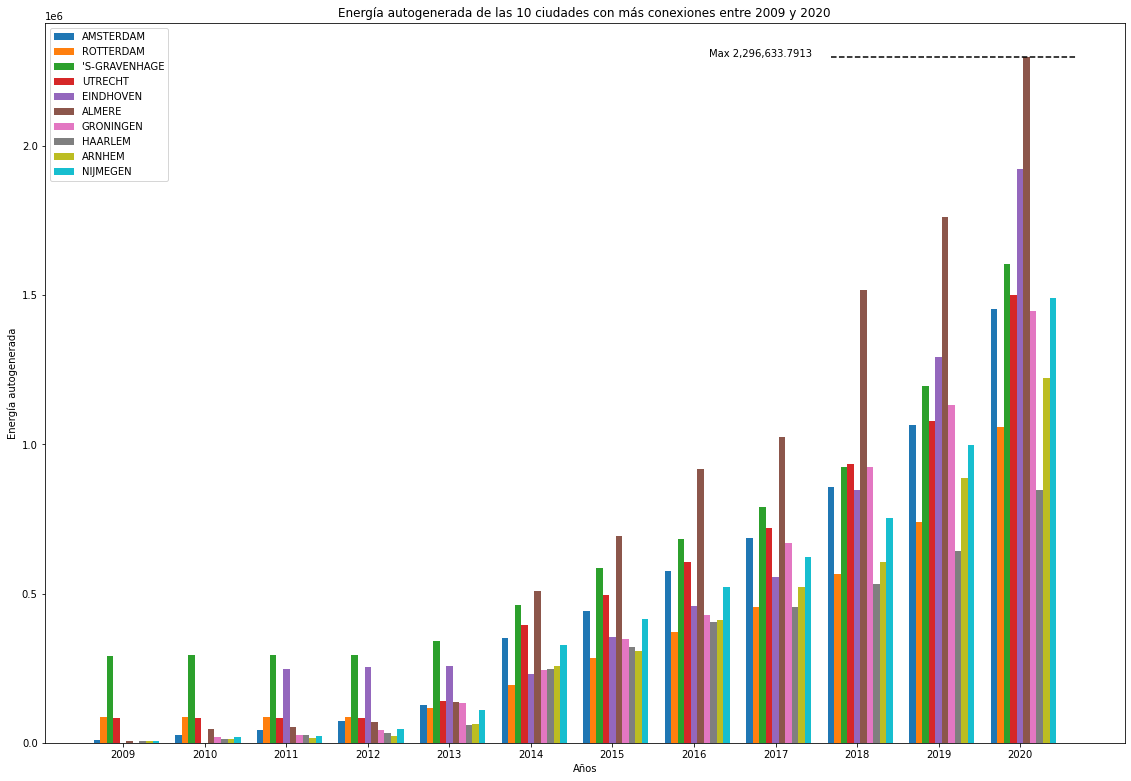

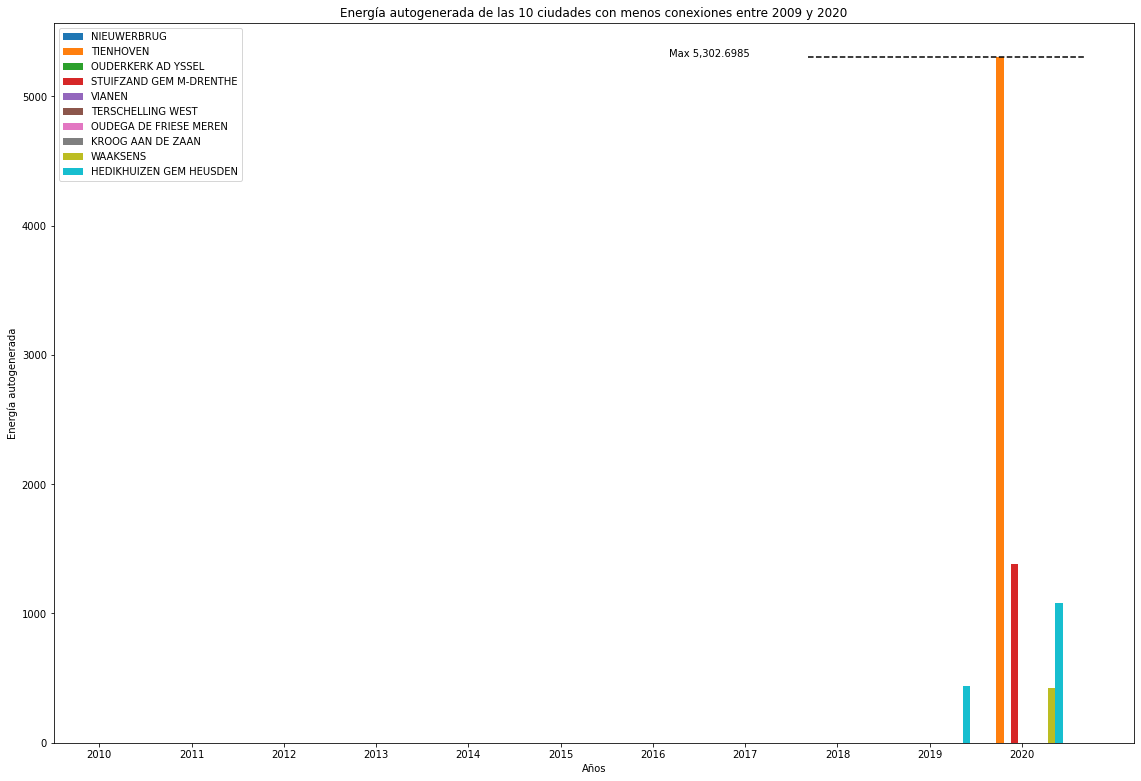

In [ ]:
# Análisis del crecimiento de la auto-producción de energía a lo largo de los años

# Ciudades con más conexiones
most_connections = df_electricity.groupby('city')['num_connections'].sum().nlargest(10).index.tolist()
least_connections = df_electricity.groupby('city')['num_connections'].sum().nsmallest(10).index.tolist()

self_production_most_connections = df_electricity[df_electricity["city"].isin(most_connections)].groupby(["city", "year"])[["self_production"]].sum()
self_production_least_connections = df_electricity[df_electricity["city"].isin(least_connections)].groupby(["city", "year"])[["self_production"]].sum()

# self_production_most_connections.apply(display)
# self_production_least_connections.apply(display)

fig_self_production_most_connections = plt.figure()
ax = fig_self_production_most_connections.add_axes([0,0,1,1])
for n, i in enumerate(most_connections):
  ax.bar([x + n * 0.8 / len(most_connections) for x in self_production_most_connections.loc[i].index.tolist()], self_production_most_connections["self_production"][i], 0.8/len(most_connections))
ax.set_xticks([x + 4 * 0.8 / len(most_connections) for x in range(2009,2021)])
ax.set_xticklabels(range(2009,2021))
ax.legend(most_connections)
ax.set_xlabel("Años")
ax.set_ylabel("Energía autogenerada")
ax.set_title("Energía autogenerada de las 10 ciudades con más conexiones entre 2009 y 2020")
ax.hlines(self_production_most_connections["self_production"].max(),2018,2021,linestyles="dashed")
ax.annotate(f"Max {self_production_most_connections['self_production'].max():,}",(2016.5,self_production_most_connections["self_production"].max()))
fig_self_production_most_connections.show()

fig_self_production_least_connections = plt.figure()
ax = fig_self_production_least_connections.add_axes([0,0,1,1])
for n, i in enumerate(least_connections):
  ax.bar([x + n * 0.8 / len(least_connections) for x in self_production_least_connections.loc[i].index.tolist()], self_production_least_connections["self_production"][i], 0.8/len(least_connections))
ax.set_xticks([x + 4 * 0.8 / len(least_connections) for x in range(2009,2021)])
ax.set_xticklabels(range(2009,2021))
ax.legend(least_connections)
ax.set_xlabel("Años")
ax.set_ylabel("Energía autogenerada")
ax.set_title("Energía autogenerada de las 10 ciudades con menos conexiones entre 2009 y 2020")
ax.hlines(self_production_least_connections["self_production"].max(),2018,2021,linestyles="dashed")
ax.annotate(f"Max {self_production_least_connections['self_production'].max():,.4f}",(2016.5,self_production_least_connections["self_production"].max()))
fig_self_production_least_connections.show()

Los gráficos anteriores muestran que si bien las ciudades con muchas conexiones tuvieron un crecimiento importante y continuo en el área de la autogeneración eléctrica entre 2009 y 2020, las ciudades con menos conexiones tuvieron un aumento mínimo o nulo en el mismo periodo.

## Conclusión
Analizando el resto de los datos obtenidos a lo largo del Taller se puede ver que la mejor industria para invertir es la de Electricidad, especialmente por la tendencia a la baja de la industria del Gas; la mejor ciudad para invertir en la venta de electricidad es Amsterdam, por su alto consumo en los últimos años; y la mejor ciudad para invertir en la venta de dispositivos para auto-producción eléctrica es Eindhoven, por su gran cantidad de clientes que producen su energía eléctrica en sus casas.

#Videos
[Joaquín Montes](https://drive.google.com/file/d/12JtzMUrBas5dtVBl1ZCe0yh18r3GGLou/view?usp=sharing)

[Carlos Naranjo](https://drive.google.com/file/d/1epoNlOj_r_06ulgU--HztTBZw38I0B83/view?usp=sharing)

[Sofía Riquelme](https://www.youtube.com/watch?v=VNNM0ypOTEY)
